# ELO competition
- [1. Understand the project and objective](#1.-Understand-the-project-and-objective)
- [2. Analysis of the train set](#2.-Analysis-of-the-train-set)
    - [2.1 Missing Values](#2.1-Missing-Values)
    - [2.2 Exploration of the target variable](#2.2-Exploration-of-the-target-variable)
    - [2.3 Exploration of the predictors from the train set](#2.3-Exploration-of-the-predictors-from-the-train-set)
- [3 Explore test data](#3-Explore-test-data)
    - [3.1 Missing values](#3.1-Missing-values)
    - [3.2 Explore predictors](#3.2-Explore-predictors)
- [4. Analysis of the merchants data](#4.-Analysis-of-the-merchants-data)
    - [4.1 Missing values](#4.1-Missing-values)
    - [4.2 Exploratory analysis](#4.2-Exploratory-analysis)
    - [4.3 Clean the merchants dataset and prepare for aggregation](#4.3-Clean-the-merchants-dataset-and-prepare-for-aggregation)
        - [4.3.1 Outliers](#4.3.1-Outliers)
        - [4.3.2 Transform columns](#4.3.2-Transform-columns)
    - [4.4 Select relevant columns for merger transactions](#4.4-Select-relevant-columns-for-merger-transactions)
- [5. Analysis of historical transactions and merger with merchants](#5.-Analysis-of-historical-transactions-and-merger-with-merchants)
    - [5.1 Missing Values](#5.1-Missing-Values)
    - [5.2 Visually explore historical dataset](#5.2-Visually-explore-historical-dataset)
    - [5.3 Clean and prepare transaction data for merger and aggregation](#5.3-Clean-and-prepare-transaction-data-for-merger-and-aggregation)
    - [5.4 Feature engineering](#5.4-Feature-engineering)
    - [5.5 Aggregate historical_df](#5.5-Aggregate-historical_df)
    - [5.6 Merch merchants with historical data](#5.6-Merch-merchants-with-historical-data)
    - [5.7 Clean hist_merch](#5.7-Clean-hist_merch])
    - [5.8 Aggregate](#5.8-Aggregate)
- [6. Explore new transactions](#6.-Explore-new-transactions)
    - [6.1 Missing Values](#6.1-Missing-Values)
    - [6.2 Visually explore nre dataset](#6.2-Visually-explore-new-dataset)
    - [6.3 Clean and prepare transaction data for merger and aggregation](#6.3-Clean-and-prepare-transaction-data-for-merger-and-aggregation)
    - [6.4 Feature engineering](#6.4-Feature-engineering)
    - [6.5 Aggregate new_df](#6.5-Aggregate-new_df)
    - [6.6 Merch merchants with historical data](#6.6-Merch-merchants-with-historical-data)
    - [6.7 Clean new_merch](#6.7-Clean-new_merch])
    - [6.8 Aggregate](#6.8-Aggregate)
- [7. Merge aggregated feature with train and test set](#7.-Merge-aggregated-feature-with-train-and-test-set)
    - [7.1 Concatenate train and testset](#7.1-Concatenate-train-and-testset)
    - [7.2 Merge aggregated historical features to the joined train-test set](#7.2-Merge-aggregated-historical-features-to-the-joined-train-test-set)
    - [7.3 Merge aggregated new features to the joined train-test set](#7.3-Merge-aggregated-new-features-to-the-joined-train-test-set)
    - [7.4 Cleanse train and test set](#7.4-Cleanse-train-and-test-set)
- [8. First inspection of correlations between train data and the target variable](#8.-First-inspection-of-correlations-between-train-data-and-the-target-variable)
- [9. Modelling](#9.-Modelling)
    - [9.1 Build regression models](#9.1-Build-regression-models)
        - [9.1.1 Prepare for model building](#9.1.1-Prepare-for-model-building)
        - [9.1.2 Multiple linear regression](#9.1.2-Multiple-linear-regression)
        - [9.1.3 Lasso](#9.1.3-Lasso)
        - [9.1.4 Ridge](#9.1.4-Ridge)
        - [9.1.5 Elastic Net](#9.1.5-Elastic-Net)
    - [9.2 Build a model with decision trees](#9.2-Build-a-model-with-decision-trees)
        - [9.2.1 Prepare for model building](#9.2.1-Prepare-for-model-building)
        - [9.2.2 DecisionTreeRegresssor](#9.2.2-DecisionTreeRegresssor)
        - [9.2.3 GradientBoostingRegressor](#9.2.3-GradientBoostingRegressor)
        - [9.2.4 RandomForestRegresso](#9.2.4-RandomForestRegresso)
    


Team: Shubham Gupta, Kadir Ider, Anneke Lohmann



## 1. Understand the project and objective

Description: Imagine being hungry in an unfamiliar part of town and getting restaurant recommendations served up, based on your personal preferences, at just the right moment. The recommendation comes with an attached discount from your credit card provider for a local place around the corner!

Right now, Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. But do these promotions work for either the consumer or the merchant? Do customers enjoy their experience? Do merchants see repeat business? Personalization is key.

Elo has built machine learning models to understand the most important aspects and preferences in their customers’ lifecycle, from food to shopping. But so far none of them is specifically tailored for an individual or profile. This is where you come in.

In this competition, Kagglers will develop algorithms to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty. Your input will improve customers’ lives and help Elo reduce unwanted campaigns, to create the right experience for customers.


###### Summarized understanding: The different tables are used to build a profile around the card holder based on his previous and new transactions to predict the loyalty of the consumer. Those variables who predict the loyalty best are then triggered to propose the right discounts and services for the individual consumer.


Overall procedure:
1. Understand the problem, discuss the team to find a common understanding and brainstorm around it
2. Visually inspect the tables and its connected data, understand how the dataset are related to each other. What are the relevant keys and foreign keys in the tables.
--> show a small graph
3. Inspect per table  missing values and if needed replace them 
4. Exploratory data analysis
5. Clean the tables and transform into the required format
6. Feature engineering
7. Merge the tables transations with merchant data and clean
8. Aggregate the features on card ID
9. Check on correlations of the different features and visualize the trainset
10. Split the preprocessing for tree versus regression prerequisits
11. Model and adapt parameters using cross validation or traintestsplit
    
##### After a first reference model both feature engineering and different models are stepwise improved.
The split between preprocessing and thus feature engineering and modeling allows to examine the impact of each parameter separately. As the outcome of the preprocessing is stored in a file previous versions can be loaded anytime.
    

To avoid strong memory overload, we decided a to adapt the process looking table wise. This allows us to delete non-used tables from RAM. The following steps were considered to release RAM: 
1. Optimize the order of processing.
2. Release tables when they are not needed anymore.
3. Implement the gc collector to remove non-linked files from RAM.
4. Import data already in the correct format using libraries.
5. Run the kernel with smaller datasets for testing .
6. Split the modelling from the preprocessing to work separately and avoid many runs of the preprocessing for modelling purpose.
7. Another option we found but could notimplement anymore is dask.dataframe which is splitting a big dataframe into several smaller pandas dataframes. It is particularly a solution for big datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
import gc
gc.enable()
sns.set()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Initialize used methods for the kernel

In [2]:
#detect an outlier based on the percentile
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

In [3]:
# search for missing data by column, reduce actual methos to save RAM
def missing_values_table(df):
        # Total missing values
        # mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        #mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        #mis_val_table_ren_columns = mis_val_table.rename(
        #columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_percent = mis_val_percent[mis_val_percent != 0].sort_values(ascending=False).round(1)
        
        # Return the dataframe with missing information
        return mis_val_percent
    # search for missing data by column    

In [4]:
def missing_id_values(df, columns, value='-1'):
    # simple method to identify how many missing id values a dataset has in id columns
    for col in columns:
        mis_val_percent = 100 * df[col][df[col]==value].count() / len(df[col])
        print(col, ': ',mis_val_percent.round(1), '%')

In [5]:
def replace_values(df, columns, old_value, new_value):
    # replace values commonly for set of columns
    for col in columns:
        df[col].replace(old_value, new_value, inplace=True)

In [6]:
# Reduce memory function was taken from the kaggle following kernel:
# https://www.kaggle.com/ashishpatel26/lightgbm-gbdt-dart-baysian-ridge-reg-lb-3-61
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

## 2. Analysis of the train set

In [7]:
#Define the datatypes for data load to control RAM. Defined after first inspection of the data
dtypesDict_tr_te = {
'card_id': 'category',
'feature_1' : 'int8',
'feature_2' : 'int8',
'feature_3' : 'int8',
'target' : 'float16'}

In [8]:
# Load the relevant datasets
train_df =  pd.read_csv("../loecher/public/train.csv.gz",dtype=dtypesDict_tr_te, parse_dates=['first_active_month'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null category
feature_1             201917 non-null int8
feature_2             201917 non-null int8
feature_3             201917 non-null int8
target                201917 non-null float16
dtypes: category(1), datetime64[ns](1), float16(1), int8(3)
memory usage: 14.8 MB


In [9]:
#get optimal datatypes for load
#df_optimal = reduce_mem_usage(train_df, verbose=True)
#df_optimal.info()

In [10]:
# First exploration of the training set.
print('The shape of the train set is: ', train_df.shape, '\n')
print(train_df.info())
print(train_df.describe())
train_df.head(10)

The shape of the train set is:  (201917, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null category
feature_1             201917 non-null int8
feature_2             201917 non-null int8
feature_3             201917 non-null int8
target                201917 non-null float16
dtypes: category(1), datetime64[ns](1), float16(1), int8(3)
memory usage: 14.8 MB
None
           feature_1      feature_2      feature_3         target
count  201917.000000  201917.000000  201917.000000  201917.000000
mean        3.105311       1.745410       0.565569            NaN
std         1.186160       0.751362       0.495683       0.000000
min         1.000000       1.000000       0.000000     -33.218750
25%         2.000000       1.000000       0.000000      -0.883301
50%         3.000000       2.000000       1.000000      -0.023438
75%         4.000000

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820312
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392822
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.687988
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142456
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159790
5,2016-09-01,C_ID_0894217f2f,4,2,0,0.871582
6,2016-12-01,C_ID_7e63323c00,3,2,1,0.230103
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.136719
8,2017-08-01,C_ID_fe0fdac8ea,2,1,0,-0.065430
9,2016-08-01,C_ID_bf62c0b49d,2,2,0,0.300049


The training set has about 200000 creditcard entries including the information of the month of the first purchase and three additional anonymized features. The dependent variable Y represents the loyalty numerical score whcih is calculated 2 months after historical and evaluation period.

According to first inspection the seems not to contain null values.

feature_1 ranges from 1 to 5
feature_2 ranges from 1 to 3
feature_3 ranges from 0 to 1

The target variable is continous and ranges from about -33 to plus 17, while the first, second and thrid quartile lies between -1 and 1. The distribution wil be analysed in the following steps.

### 2.1 Missing Values

In [11]:
#Check for missing values
mis_val = missing_values_table(train_df)
mis_val

Series([], dtype: float64)

There are no missing values in the train set.

### 2.2 Exploration of the target variable

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


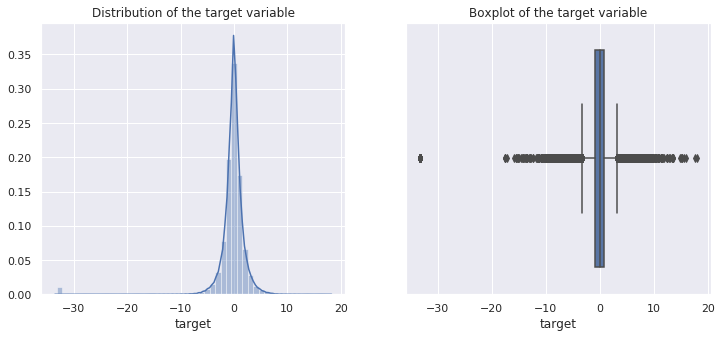

In [12]:
y_train = train_df['target']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(y_train, ax=ax1)
ax1.set_title('Distribution of the target variable')
sns.boxplot(y_train, ax=ax2)
ax2.set_title('Boxplot of the target variable')

plt.show()

The distribution of the loyalty numarical score spreads mainly spreads around -10 to +10. 
Clearly seen in the boxplot, there are some clear outliars at below -30.

In [13]:
# Inspect the strong outliars with score lower than -30
check = y_train[y_train < -30]
print('Values lower than -30 have one unique value: ', check.unique(), '. \n This occurs', len(check) , 'times which is ', np.round(np.divide(len(check),len(y_train))*100, 2), '% of the dataset.')

Values lower than -30 have one unique value:  [-33.21875] . 
 This occurs 2207 times which is  1.09 % of the dataset.


In [14]:
train_df[y_train < -30].index

Int64Index([    64,     92,    125,    151,    225,    248,    254,    386,
               467,    515,
            ...
            200751, 200815, 200831, 201012, 201050, 201169, 201262, 201368,
            201519, 201521],
           dtype='int64', length=2207)

The target values far out are potential outliers to be further checked later. It may be considered to remove these entries from the dataset when analysing correlations to features.

### 2.3 Exploration of the predictors from the train set

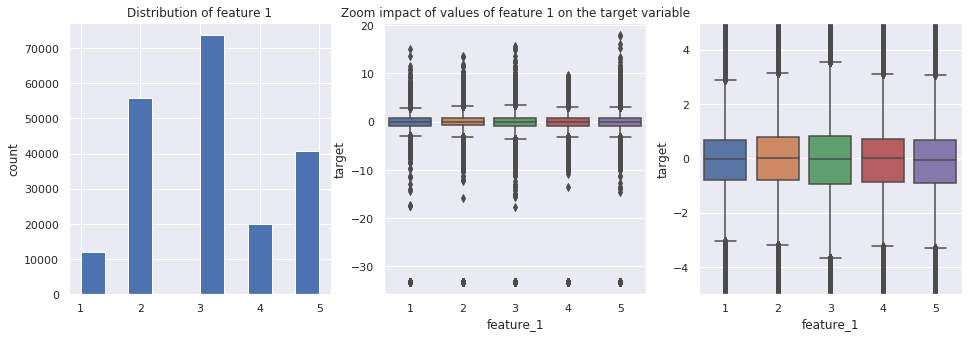

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
ax1.hist(train_df.feature_1)
ax1.set_title('Distribution of feature 1')
ax1.set_ylabel('count')

sns.boxplot(train_df.feature_1,train_df.target,  ax=ax2)
ax2.set_title('Impact of values of feature 1 on the target variable')


sns.boxplot(train_df.feature_1,train_df.target,  ax=ax3)
ax3.set_ylim(-5, 5)
ax2.set_title('Zoom impact of values of feature 1 on the target variable')

plt.show()

Feature_1 is categorically distributed. Comparing the values against the target variable, there is no visually significant difference between the categories regarding the impact on the loyalty score target variable.
Also the outliers from y are appearing across all categories.


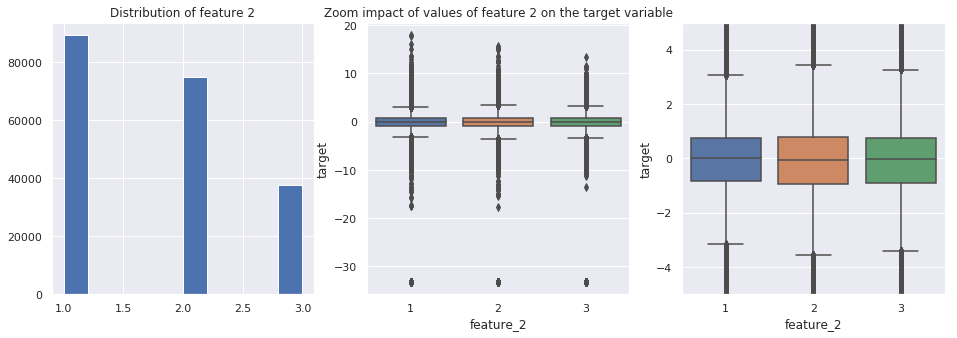

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
ax1.hist(train_df.feature_2)
ax1.set_title('Distribution of feature 2')

sns.boxplot(train_df.feature_2,train_df.target,  ax=ax2)
ax2.set_title('Impact of values of feature 2 on the target variable')

sns.boxplot(train_df.feature_2,train_df.target,  ax=ax3)
ax3.set_ylim(-5, 5)
ax2.set_title('Zoom impact of values of feature 2 on the target variable')

plt.show()

Feature_2 is as well categorically distributed. The frequency decreases the higher the categorical value. Comparing the values against the target variable, there is no visually significant difference between the categories regarding the impact on the loyalty score target variable.
Also the outliers from y are appearing across all categories.


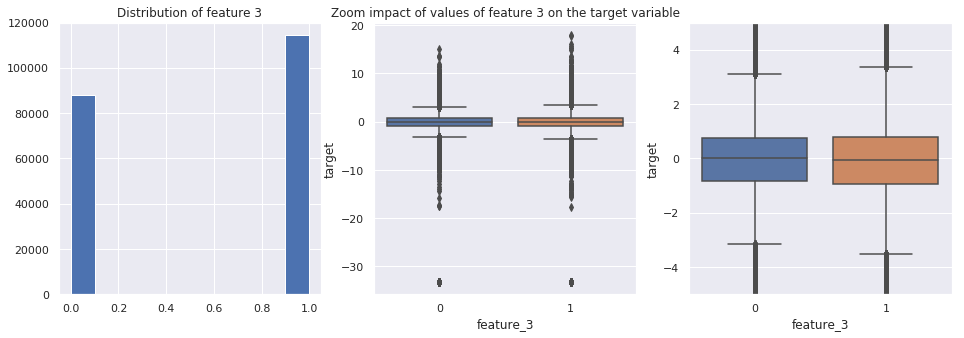

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
ax1.hist(train_df.feature_3)
ax1.set_title('Distribution of feature 3')

sns.boxplot(train_df.feature_3,train_df.target,  ax=ax2)
ax2.set_title('Impact of values of feature 3 on the target variable')

sns.boxplot(train_df.feature_3,train_df.target,  ax=ax3)
ax3.set_ylim(-5, 5)
ax2.set_title('Zoom impact of values of feature 3 on the target variable')

plt.show()

Feature_3 is categorical and binary with the values 0 and 1. Comparing the values against the target variable, there is no visually significant difference between the categories regarding the impact on the loyalty score target variable.
Also the outliers from y are appearing across all categories.


Conclusion of exploratory analysis of feature 1-3 from train data set against the loyalty score:
None pf the three features linked to the card ID in the training dataset seem to have a significant impact on the numerical loyalty score.
Thus alternaitve features have to be found from the additional datasets given.

None of the featues can provide an explanation for the outliers from the target variable.

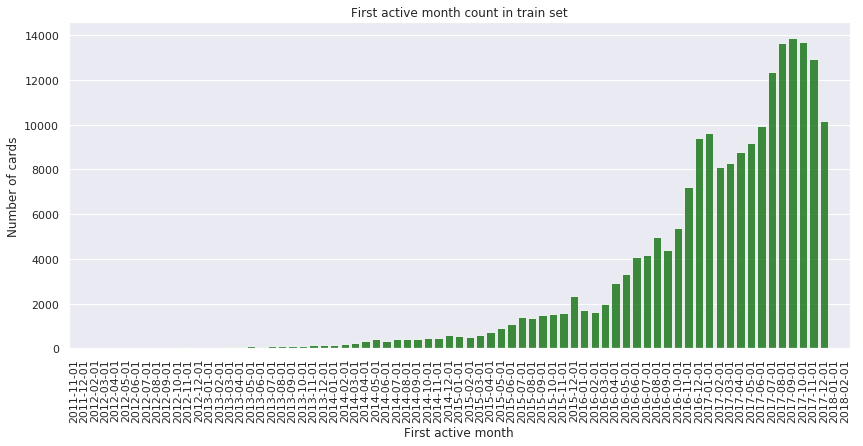

In [18]:
cnt_srs = train_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

#plt.hist(train_df.first_active_month, bins=50)
#plt.show()

plt.figure(figsize=(14,6))
plt.plot(train_df.first_active_month, train_df.target, marker='.', linestyle='None')
plt.show()

In [19]:
del train_df # Delete trainset for now for memory reduction
gc.collect()

14715

## 3 Explore test data

In [20]:
# Load the test data for exploratory inspection
test_df = pd.read_csv("../loecher/public/test.csv.gz",dtype=dtypesDict_tr_te, parse_dates=['first_active_month'])

### 3.1 Missing values

missing_values_table(train_df)

There is no missing data in the test_set.

### 3.2 Explore predictors

Text(0.5,1,'Testset - Distribution of feature 3')

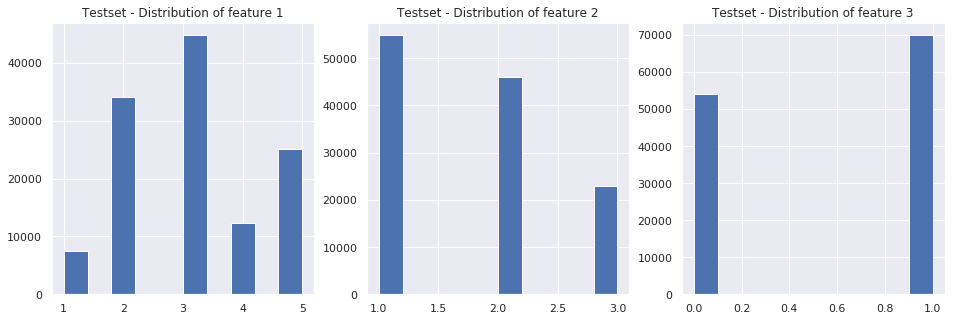

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
ax1.hist(test_df.feature_1)
ax1.set_title('Testset - Distribution of feature 1')

ax2.hist(test_df.feature_2)
ax2.set_title('Testset - Distribution of feature 2')

ax3.hist(test_df.feature_3)
ax3.set_title('Testset - Distribution of feature 3')

The feature distribution of the test data looks very similar towards the distribution of the train data. However the visualization in train data against the target variable showed already that the features are no good predictors. Thus we will not further deep dive here.

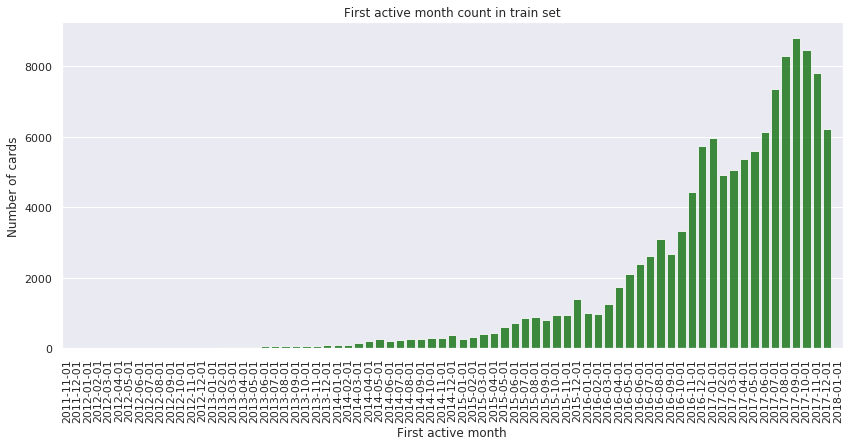

In [22]:
cnt_srs = test_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

Also this distribution looks very similar towards the trainset. The train set against target variable plot showed no clear trend either.

In [23]:
del test_df
gc.collect()

21855

## 4. Analysis of the merchants data

In [24]:
#Define datatypes for importing
dtypesDict_merch = {
'merchant_id'                    : 'category',
'merchant_group_id'              : 'category',
'merchant_category_id'           : 'category',
'subsector_id'                   : 'category',
'numerical_1'                    : 'float16',
'numerical_2'                    : 'float16',
'category_1'                     : 'category',
'most_recent_sales_range'        : 'category',
'most_recent_purchases_range'    : 'category',
'avg_sales_lag3'                 : 'float32',
'avg_purchases_lag3'             : 'float64',
'active_months_lag3'             : 'int8',
'avg_sales_lag6'                 : 'float32',
'avg_purchases_lag6'             : 'float64',
'active_months_lag6'             : 'int8',
'avg_sales_lag12'                : 'float32',
'avg_purchases_lag12'            : 'float64',
'active_months_lag12'            : 'int8',
'category_4'                     : 'category',
'city_id'                        : 'category',
'state_id'                       : 'category',
'category_2'                     : 'float16'}

In [25]:
#Load merchants data
merch_df = pd.read_csv("../loecher/public/merchants.csv.gz", dtype=dtypesDict_merch)
merch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null category
merchant_group_id              334696 non-null category
merchant_category_id           334696 non-null category
subsector_id                   334696 non-null category
numerical_1                    334696 non-null float16
numerical_2                    334696 non-null float16
category_1                     334696 non-null category
most_recent_sales_range        334696 non-null category
most_recent_purchases_range    334696 non-null category
avg_sales_lag3                 334683 non-null float32
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int8
avg_sales_lag6                 334683 non-null float32
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int8
avg_sales_lag12                334683 non-null float32
avg_purc

In [26]:
#Find the optimal datatypes for importing
#df_optimal = reduce_mem_usage(merch_df, verbose=True)
#df_optimal.info()

In [27]:
# First exploration of the merchants data set.
print('The shape of the train set is: ', merch_df.shape, '\n')
print(merch_df.info())
print(merch_df.describe())

merch_df.head(10)

The shape of the train set is:  (334696, 22) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null category
merchant_group_id              334696 non-null category
merchant_category_id           334696 non-null category
subsector_id                   334696 non-null category
numerical_1                    334696 non-null float16
numerical_2                    334696 non-null float16
category_1                     334696 non-null category
most_recent_sales_range        334696 non-null category
most_recent_purchases_range    334696 non-null category
avg_sales_lag3                 334683 non-null float32
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int8
avg_sales_lag6                 334683 non-null float32
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int8
avg_sales_lag12 

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,...,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,...,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,...,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057465,-0.057465,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057465,-0.057465,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057465,-0.057465,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN


From the .info we see already that some columns have missing values, however not too many.

The statistical summary gives already quite some insights about the quality of the dataset and the distribution of some  variables. We see that for the continuous variables, that the inter quartile range is much smaller than the min and especially the max. In the average purchase lag we see that even infinite values are part of the distribution. 

The .head() function shows already that some IDs have  -1 values. We will inspeact that later on.

Overall, the statistical summary will help in to following steps the explore more information from merchants information.

### 4.1 Missing values

In [28]:
# check for missing values in merch_df
merchdf_msng = missing_values_table(merch_df)
merchdf_msng

category_2         3.6
avg_sales_lag12    0.0
avg_sales_lag6     0.0
avg_sales_lag3     0.0
dtype: float64

In [29]:
#visualization of missing values and their location + double checking missing values in other columns
#sns.heatmap(merch_df.isnull(), cbar=False)

The few missing values from the average sales lag we replace by the median. 

In [30]:
#avg_sales_lag Replace NAN with median
merch_df['avg_sales_lag3'].replace(np.nan, merch_df['avg_sales_lag3'].median(),inplace=True)
merch_df['avg_sales_lag6'].replace(np.nan, merch_df['avg_sales_lag6'].median(),inplace=True)                             
merch_df['avg_sales_lag12'].replace(np.nan, merch_df['avg_sales_lag12'].median(),inplace=True)   

#Check for missing values again
#missing_values_table(merch_df)

For 'category_2', since it has about 3.6% of missing values, let's replace them with the most frequent value.

Code is marked down , as we decided to not take the data over during the merge with historical and new data. So cleansing not necessary.

In [31]:
#category2: replace missing values with most common value
#merch_df['category_2'].fillna(merch_df['category_2'].value_counts().index[0],inplace=True)
#print('Number of missing values in category_2 column is: ' + str(merch_df_new.isnull().sum()))

From the inspection of the statistical summary, we derived a set of infinite values for the purchase_lag columns. Those are replaced by median values for now. The visualization of infinite values does not work for distribution plot and boxplots.

In [32]:
#replacing infinite values with the median
merch_df['avg_purchases_lag3'].replace([np.inf,-np.inf],np.median(merch_df['avg_purchases_lag3']) ,inplace=True)
merch_df['avg_purchases_lag6'].replace([np.inf,-np.inf],np.median(merch_df['avg_purchases_lag6']),inplace=True)
merch_df['avg_purchases_lag12'].replace([np.inf,-np.inf],np.median(merch_df['avg_purchases_lag12']),inplace=True)

From the statistical summary we saw that some id columns have a min value of -1 which we assume as being missing values. The following table summarizes the missing id values. 30% missing values for city is relatively high. We will thus check and potentially consider the city information from transactions as main source.

In [33]:
id_columns = ['city_id','state_id','subsector_id', 'merchant_id', 'merchant_category_id', 'merchant_group_id'  ]
missing_id_values(merch_df, id_columns)

city_id :  31.4 %
state_id :  3.6 %
subsector_id :  0.0 %
merchant_id :  0.0 %
merchant_category_id :  0.0 %
merchant_group_id :  0.0 %


In [34]:
#Replace -1 values by "none" as these are assumed to be missing values
#replace_values(merch_df, id_columns, '-1', 'None')

### 4.2 Exploratory analysis

##### Average Sales Lag Analysis


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


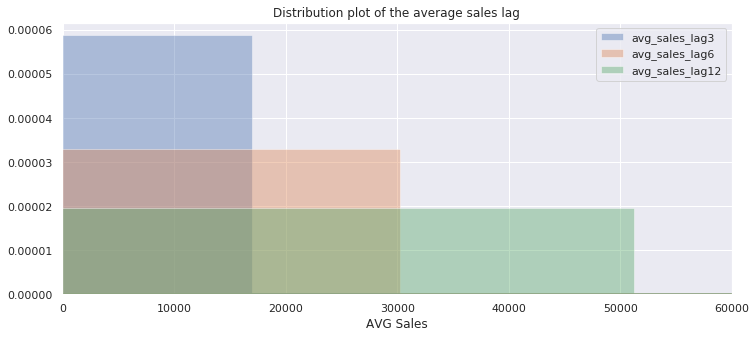

In [35]:
# Plot average sales lag in one graph
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
sns.distplot(merch_df['avg_sales_lag3'])
ax1.set_xlim([merch_df['avg_sales_lag3'].min(),60000])
sns.distplot(merch_df['avg_sales_lag6'], ax=ax1)
sns.distplot(merch_df['avg_sales_lag12'], ax=ax1)
plt.xlabel('AVG Sales')
plt.legend(['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12'])
plt.title('Distribution plot of the average sales lag')

plt.show()

Average Sales Lag X: Monthly average of revenue in last X months divided by revenue in last active month represents a quotient. If the revenue of the last month is much lower than the revenue of the last x months the quotient becomes very big. If the revenue of the last month is higher than the previous months, the quotient lies between 0 and 1. If revenue is negative, also the quotient may be negative.

The first intention is a simple distribution plot, however the related distribution looks strange and does not fit towards the individual data from the head() function. The statistical summary from .describe() however gives a hint for strong outliers (compare max vs. percentiles), thus further investigations have to be done.

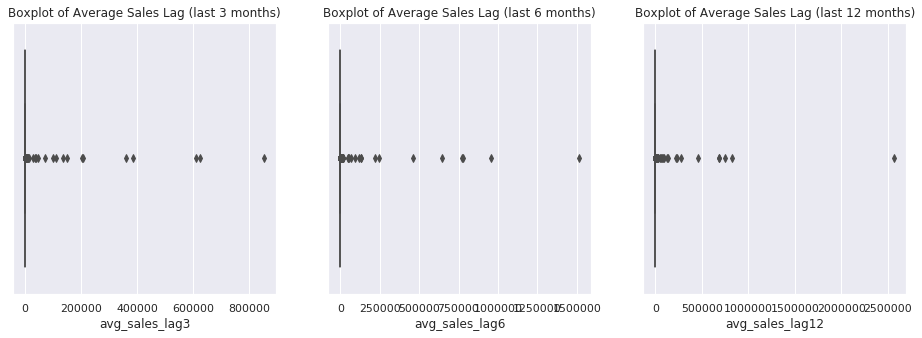

In [36]:
# Boxplot for the average sales lags
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
sns.boxplot(merch_df['avg_sales_lag3'], ax=ax1)
ax1.set_title('Boxplot of Average Sales Lag (last 3 months)')
sns.boxplot(merch_df['avg_sales_lag6'], ax=ax2)
ax2.set_title('Boxplot of Average Sales Lag (last 6 months)')
sns.boxplot(merch_df['avg_sales_lag12'], ax=ax3)
ax3.set_title('Boxplot of Average Sales Lag (last 12 months)')

plt.show()

In [37]:
#show the strong outliers
print(merch_df.loc[merch_df['avg_sales_lag3']>400000,['merchant_id','avg_sales_lag3']]) 
print(merch_df.loc[merch_df['avg_sales_lag6']>400000,['merchant_id','avg_sales_lag6']])
print(merch_df.loc[merch_df['avg_sales_lag12']>400000,['merchant_id','avg_sales_lag12']])

         merchant_id  avg_sales_lag3
21   M_ID_39643c7d93      608433.000
28   M_ID_3c87a47f6b      624741.000
235  M_ID_7ce96c351a      851844.625
         merchant_id  avg_sales_lag6
21   M_ID_39643c7d93    7.766830e+05
23   M_ID_e16b20b50a    4.641840e+05
24   M_ID_0f0334c393    1.513959e+06
27   M_ID_69618a786a    6.467640e+05
28   M_ID_3c87a47f6b    9.537920e+05
235  M_ID_7ce96c351a    7.704433e+05
         merchant_id  avg_sales_lag12
21   M_ID_39643c7d93       749804.000
23   M_ID_e16b20b50a       460206.000
24   M_ID_0f0334c393      2567408.000
27   M_ID_69618a786a       683700.000
28   M_ID_3c87a47f6b       827191.000
235  M_ID_7ce96c351a       689561.875


The boxplots show very strong outliers which are quotients where sales of the last months were much lower than the average of the last 3 months. The main distrubution however lies to be close around 0.
The very strong outliers come almost from the same merchants.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


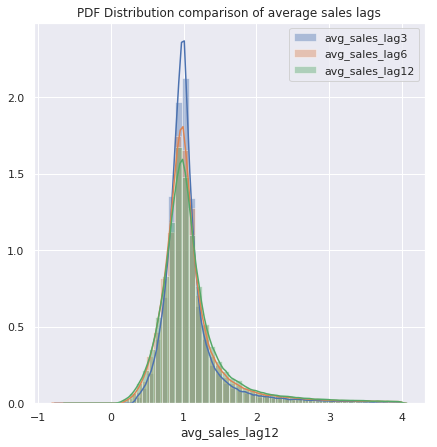

In [38]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,7))
sns.distplot(merch_df.loc[np.logical_and(merch_df['avg_sales_lag3']<4,merch_df['avg_sales_lag3']>-1) ,'avg_sales_lag3'], ax=ax1)
sns.distplot(merch_df.loc[np.logical_and(merch_df['avg_sales_lag6']<4,merch_df['avg_sales_lag6']>-1) ,'avg_sales_lag6'], ax=ax1)
sns.distplot(merch_df.loc[np.logical_and(merch_df['avg_sales_lag12']<4,merch_df['avg_sales_lag12']>-1) ,'avg_sales_lag12'], ax=ax1)
plt.legend(['avg_sales_lag3', 'avg_sales_lag6', 'avg_sales_lag12'])
plt.title('PDF Distribution comparison of average sales lags')

plt.show()

Zooming in between -1 and 4, a distribution close to the normal distribution is shown. We will thus consider to clean the data from the outliers later on. Unfortunately, we cannot just drop the lines as other predictors may be relevant for the prediction.

##### Average purchasing lag

The average purchasing lag represents the monthly average of transactions in last X months divided by transactions in last active month represents a quotient. If the number of transactions of the last month is much lower than the average number of transactions of the last x months the quotient becomes very big. If the number of transactions of the last month is much higher than the average of the previous months, the quotient lies between 0 and 1. 



There were three merchants where the average purchase lag quotient goes against infinity, probably coming from 0 transactions in the last month. Those were removed already in the missing value processing.

Based on the statistical summary from the beginning of merchants analysis, the range between min and max and the values for the first to third percentile, gives again a hint for outliers. A boxplot should illustrate them.

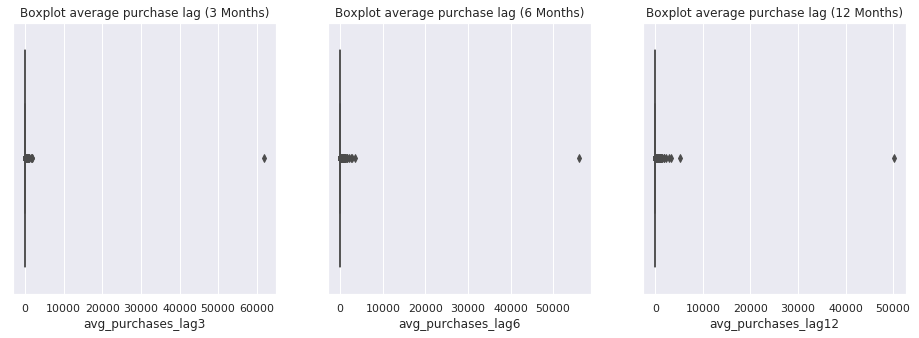

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
sns.boxplot(merch_df['avg_purchases_lag3'], ax=ax1)
ax1.set_title('Boxplot average purchase lag (3 Months)')
sns.boxplot(merch_df['avg_purchases_lag6'], ax=ax2)
ax2.set_title('Boxplot average purchase lag (6 Months)')
sns.boxplot(merch_df['avg_purchases_lag12'], ax=ax3)
ax3.set_title('Boxplot average purchase lag (12 Months)')

plt.show()

As expected, the boxplot shows one very strong outlier:

In [40]:
#show the outlier
print(merch_df.loc[merch_df['avg_purchases_lag3']>50000,['merchant_id','avg_purchases_lag3']]) 
print(merch_df.loc[merch_df['avg_purchases_lag6']>50000,['merchant_id','avg_purchases_lag3']])
print(merch_df.loc[merch_df['avg_purchases_lag12']>50000,['merchant_id','avg_purchases_lag3']])

         merchant_id  avg_purchases_lag3
235  M_ID_7ce96c351a        61851.333333
         merchant_id  avg_purchases_lag3
235  M_ID_7ce96c351a        61851.333333
         merchant_id  avg_purchases_lag3
235  M_ID_7ce96c351a        61851.333333


the very strong outlier comes from index 235,  M_ID_7ce96c351a.

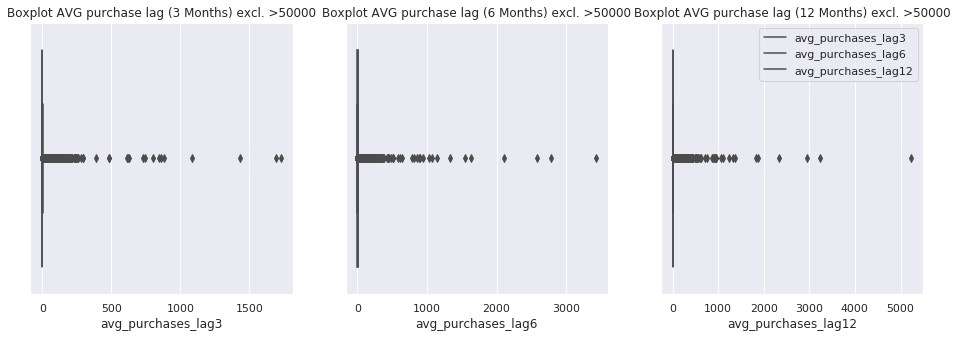

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
sns.boxplot(merch_df.loc[merch_df['avg_purchases_lag3']<50000,'avg_purchases_lag3'], ax=ax1)
ax1.set_title('Boxplot AVG purchase lag (3 Months) excl. >50000')
sns.boxplot(merch_df.loc[merch_df['avg_purchases_lag6']<50000,'avg_purchases_lag6'], ax=ax2)
ax2.set_title('Boxplot AVG purchase lag (6 Months) excl. >50000')
sns.boxplot(merch_df.loc[merch_df['avg_purchases_lag12']<50000,'avg_purchases_lag12'], ax=ax3)
ax3.set_title('Boxplot AVG purchase lag (12 Months) excl. >50000')

plt.legend(['avg_purchases_lag3','avg_purchases_lag6','avg_purchases_lag12'])

plt.show()

even after first correction of the main outliers, there are many further outliers, which we will not tough now but consider later.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


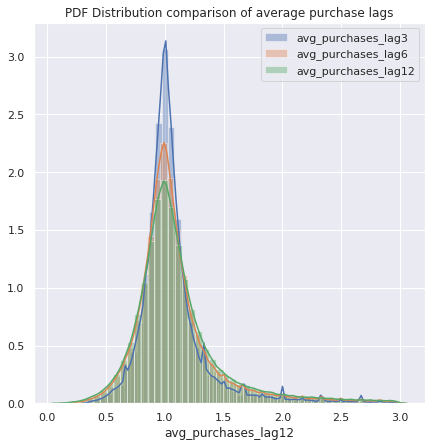

In [42]:
fig, (ax1) = plt.subplots(1,1, figsize=(7,7))
sns.distplot(merch_df.loc[merch_df['avg_purchases_lag3']<3,'avg_purchases_lag3'], ax=ax1)
sns.distplot(merch_df.loc[merch_df['avg_purchases_lag6']<3,'avg_purchases_lag6'], ax=ax1)
sns.distplot(merch_df.loc[merch_df['avg_purchases_lag12']<3,'avg_purchases_lag12'], ax=ax1)
plt.legend(['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12'])
plt.title('PDF Distribution comparison of average purchase lags')

plt.show()

Finally, zooming in the average purchase lag between 0 and 3, a close to normal distribution is shown.

##### Active months lag

The active months lag describes the quantity of active months within last X months. Most of the merchants were active in all the last months.
Those who are active just one months in the last period, probably just opened/ got registered.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


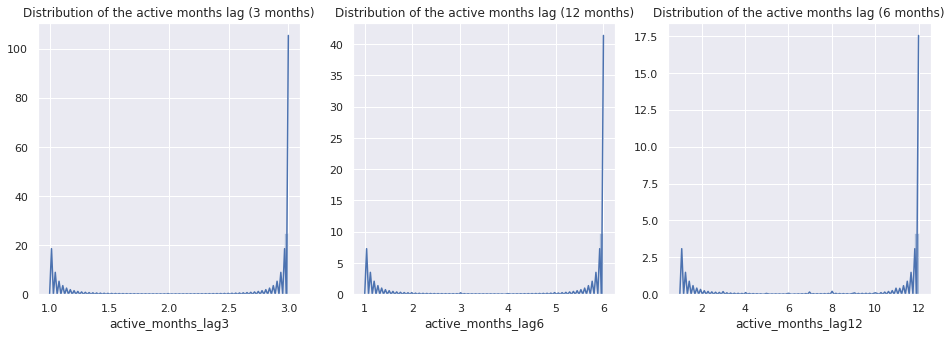

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
sns.distplot(merch_df['active_months_lag3'], ax=ax1)
ax1.set_title('Distribution of the active months lag (3 months)')

sns.distplot(merch_df['active_months_lag6'], ax=ax2)
ax3.set_title('Distribution of the active months lag (6 months)')

sns.distplot(merch_df['active_months_lag12'], ax=ax3)
ax2.set_title('Distribution of the active months lag (12 months)')

plt.show()

##### Analyse categorical values

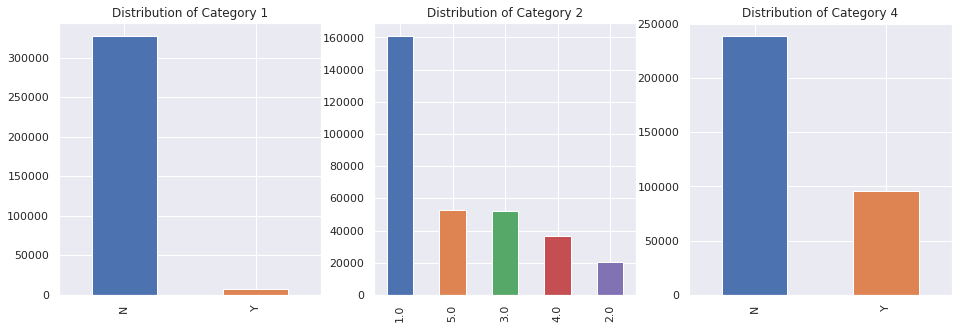

In [44]:
cat1 = merch_df['category_1'].value_counts()
cat2 = merch_df['category_2'].value_counts()
cat4 = merch_df['category_4'].value_counts()


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
cat1.plot.bar(ax=ax1)
ax1.set_title('Distribution of Category 1')

cat2.plot.bar(ax=ax2)
ax2.set_title('Distribution of Category 2')

cat4.plot.bar(ax=ax3)
ax3.set_title('Distribution of Category 4')


plt.show()

Category 1 and 4 are yes/no responses which could be translated to 0 and 1 lateron.
Category 2 has 5 categories. Unfortunately, the anonymized categories do not allow much interpretation, we can thus just accept the information from ELO that the features may be relevant.

##### Most recent purchase and sales range

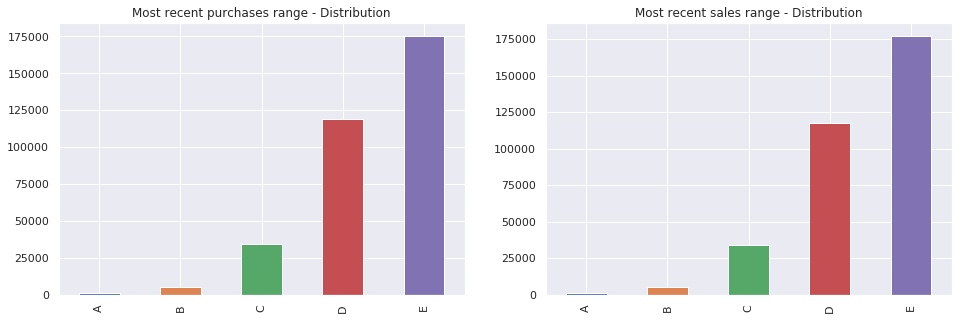

In [45]:
mrpr = merch_df['most_recent_purchases_range'].value_counts(ascending=True)
mrsr = merch_df['most_recent_sales_range'].value_counts(ascending=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
mrpr.plot.bar(ax=ax1)
ax1.set_title('Most recent purchases range - Distribution')
mrsr.plot.bar(ax=ax2)
ax2.set_title('Most recent sales range - Distribution')

plt.show()

The purchase and sales range does also not allow too much interpretation. Clearly, most of the merchants follow the purchase range E, going anti-alphabetically down to A.

##### Numerical measures

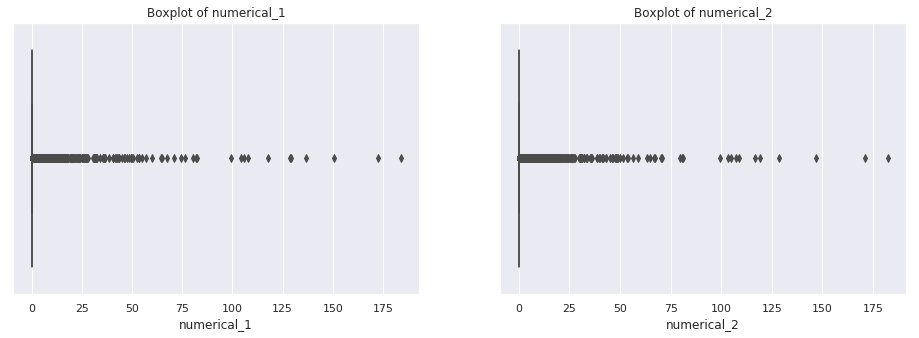

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
sns.boxplot(merch_df['numerical_1'], ax=ax1)
ax1.set_title('Boxplot of numerical_1')


sns.boxplot(merch_df['numerical_2'], ax=ax2)
ax2.set_title('Boxplot of numerical_2')

plt.show()

Simliar towards the average sales and purchase lag, also the numerical parameters have very strong outliers. We will try to minimize them slightly.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


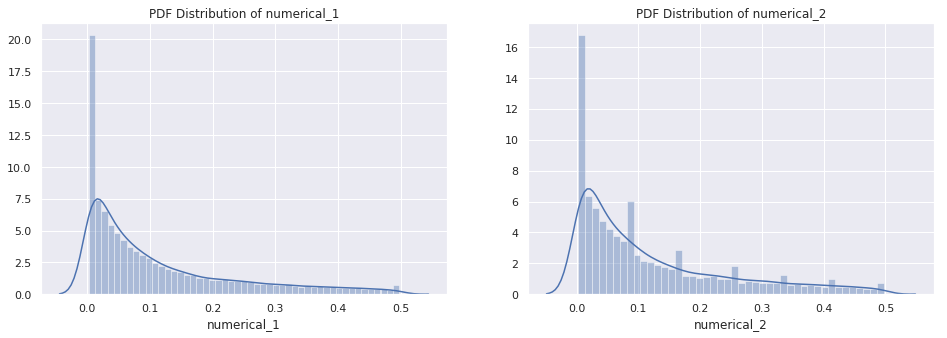

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

sns.distplot(merch_df.loc[np.logical_and(merch_df['numerical_1']<0.5,merch_df['numerical_1']>0) ,'numerical_1'], ax=ax1)
ax1.set_title('PDF Distribution of numerical_1')

sns.distplot(merch_df.loc[np.logical_and(merch_df['numerical_2']<0.5,merch_df['numerical_2']>0) ,'numerical_2'], ax=ax2)
ax2.set_title('PDF Distribution of numerical_2')

plt.show()

The shape of the distribution of the numerical features are very close to each other.  Clearly, most of the merchants have 0 here. 

##### ID measures

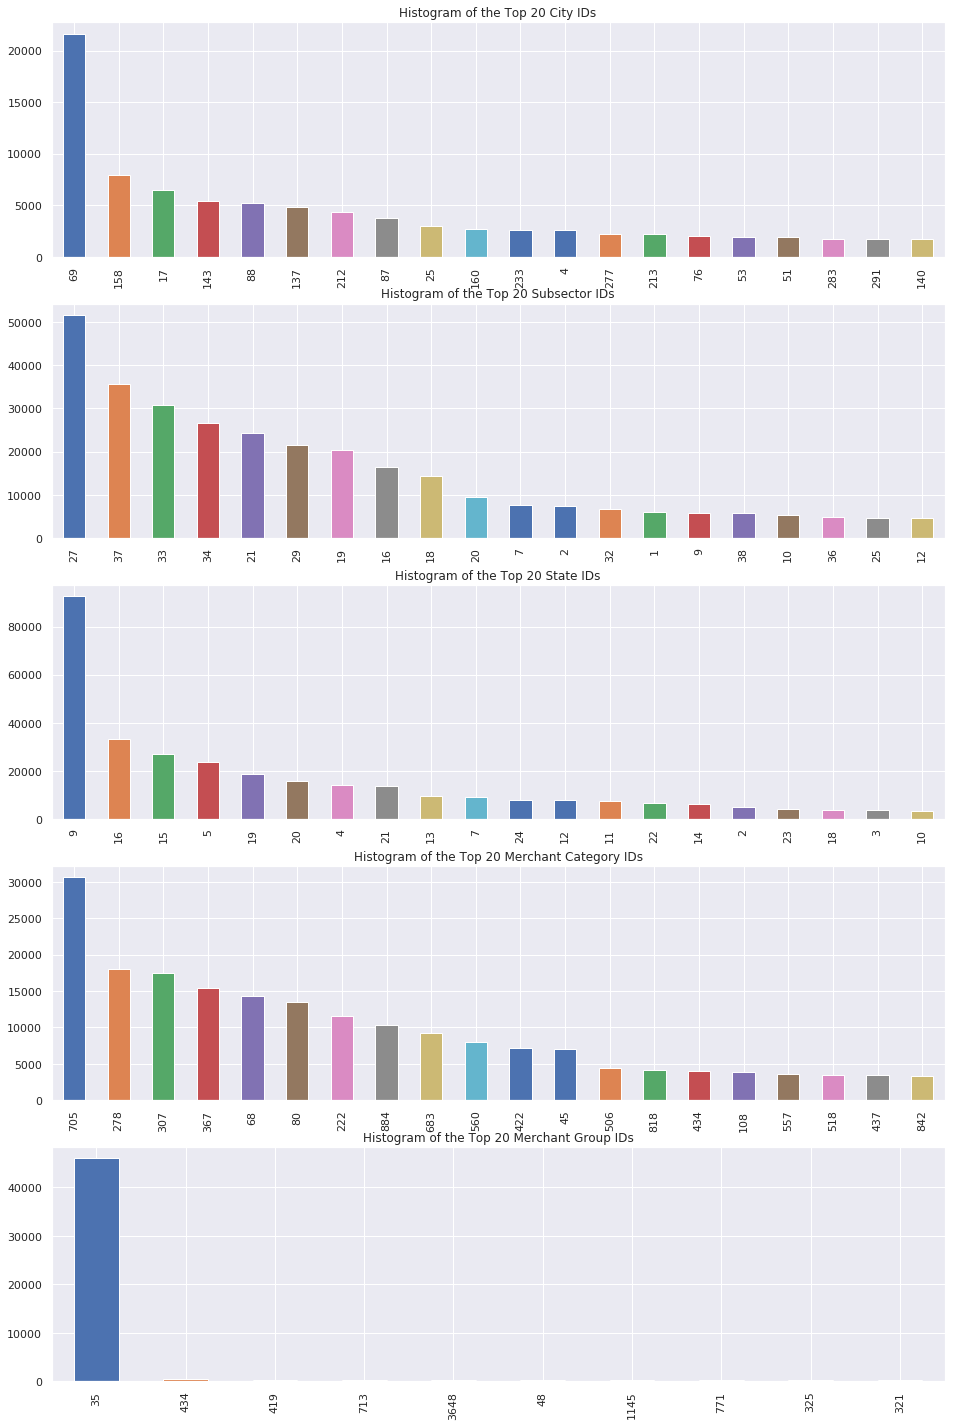

In [48]:
# Count the values for each ID
city_id = merch_df.loc[merch_df['city_id']!='-1','city_id'].value_counts()
state_id = merch_df.loc[merch_df['state_id']!='-1','state_id'].value_counts()
subsector_id = merch_df.loc[merch_df['subsector_id']!='-1','subsector_id'].value_counts()
merchant_category_id = merch_df.loc[merch_df['merchant_category_id']!='-1','merchant_category_id'].value_counts()
merchant_group_id = merch_df.loc[merch_df['merchant_group_id']!='-1','merchant_group_id'].value_counts()

# Plot the top 20 of the top ID features
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, figsize=(16,25))
city_id[:20].plot.bar(ax=ax1)
ax1.set_title('Histogram of the Top 20 City IDs')

subsector_id[:20].plot.bar(ax=ax2)
ax2.set_title('Histogram of the Top 20 Subsector IDs')

state_id[:20].plot.bar(ax=ax3)
ax3.set_title('Histogram of the Top 20 State IDs')


merchant_category_id[:20].plot.bar(ax=ax4)
ax4.set_title('Histogram of the Top 20 Merchant Category IDs')

merchant_group_id[:10].plot.bar(ax=ax5)
ax5.set_title('Histogram of the Top 20 Merchant Group IDs')

plt.show()

The histograms of the categorical features repressented by their ID show the Top 20 of each. Clearly there is one city, subsector and state which most merchants are situated. This may be linked towards the capital of Brazil, followed by some other metropoles and connected subsectors or states. 
Next to that there is one merchant group where many merchants are categorized into. Other categories are far less represented.

### 4.3 Clean the merchants dataset and prepare for aggregation 

#### 4.3.1 Outliers

As the average sales lag, the average purchase lag and the numerical features have very strong outliers, we decided to remove them from the dataset. By that we are getting closer towards the zoomed in distribution from above.
We took a threshold of 99% for now even if it may be considered to be taken stronger, but we also do not want to delete data which can be well used for prediction. 

Checking the final correlation coefficients removing outliers was helping to increase the correlation. We played a bit with the threshold, however 99% seemed to be a reasonable choice.
Next to that we want to minimize the impact on decision trees which can handle outliers very well.

In [49]:
# Identify outliers with a threshold of 99
outlier_asl3 = merch_df[percentile_based_outlier(merch_df['avg_sales_lag3'], threshold=99)].index
outlier_asl6 = merch_df[percentile_based_outlier(merch_df['avg_sales_lag6'], threshold=99)].index
outlier_asl12 = merch_df[percentile_based_outlier(merch_df['avg_sales_lag12'], threshold=99)].index
outlier_asl12

Int64Index([     0,      1,      2,     16,     17,     18,     19,     20,
                21,     22,
            ...
            329142, 329311, 329404, 331136, 331786, 332539, 332967, 333258,
            334237, 334681],
           dtype='int64', length=3333)

In [50]:
# Identify outliers with a threshold of 99
outlier_apl3 = merch_df[percentile_based_outlier(merch_df['avg_purchases_lag3'], threshold=99)].index
outlier_apl6 = merch_df[percentile_based_outlier(merch_df['avg_purchases_lag6'], threshold=99)].index
outlier_apl12 = merch_df[percentile_based_outlier(merch_df['avg_purchases_lag12'], threshold=99)].index
outlier_apl12

Int64Index([     2,      4,      8,     15,     19,     22,     23,     24,
                27,     28,
            ...
            330326, 330538, 331136, 332539, 332967, 333258, 333615, 334202,
            334237, 334681],
           dtype='int64', length=3348)

In [51]:
# Identify outliers with a threshold of 99
outlier_num1 = merch_df[percentile_based_outlier(merch_df['numerical_1'], threshold=99)].index
outlier_num2 = merch_df[percentile_based_outlier(merch_df['numerical_2'], threshold=99)].index


In [52]:
# collect the indexes in an array
array = np.concatenate([outlier_asl12, outlier_asl6, outlier_asl3, outlier_apl12, outlier_apl6, outlier_apl3, outlier_num1, outlier_num2], axis=0)
# retrieve the unique values
array = np.unique(array)
#check how many ourliers will be removed
len(array)

9355

In [53]:
# drop the outliers
merch_df.drop(array, axis=0, inplace=True)

#### 4.3.2 Transform columns 

For categorical columns dummies are chosen. In this case we decided not to drop one column as we would like to see the correlation of each categorical variable against target later. As the data is anonymous and cannot be further interpreted, we may consider to prune single attributes of the category which do not show any correlation.

In [54]:
#Transoform data (str to int)
merch_df['category_1'] = merch_df['category_1'].map({'Y':1,'N':0})
merch_df['category_4'] = merch_df['category_4'].map({'Y':1,'N':0})
#Transoform data
#merch_df['category_1'].dtype

In [55]:
#Get dummy data for 'most_recent_sales_range' and 'most_recent_purchases_range' 
merch_df_dum = pd.get_dummies(merch_df,columns=['most_recent_sales_range', 'most_recent_purchases_range'], dtype='int8')

In [56]:
#merch_df_dum.info()

### 4.4 Select relevant columns for merger transactions

Knowing that some information about the merchant is already part of the transactions, we drop the columns here ['city_id','state_id', 'subsector_id','category_1', 'category_2', 'merchant_category_id' ]. We assume that the data of merchants versus transactions is almost the same.

In [57]:
#filter the merchants data to avoid duplicate columns from transaction tables
merch_df_join = merch_df_dum.loc[:,merch_df_dum.columns.difference(['city_id','state_id', 'subsector_id','category_1', 'category_2', 'merchant_category_id' ])]
#merch_df_join.info()

In [58]:
del merch_df
del merch_df_dum
gc.collect()

16589

Finally the merchants dataset is prepared for merging with historical or new transactions.

## 5. Analysis of historical transactions and merger with merchants

After having analysed and cleaned the merchants data, we will now deepen into historical transactions.

In [59]:
#creating a dictionary for defining the dtypes of the data load of historical transactions

dtypesDict_hist_new = {
'authorized_flag'        :  'category',
'card_id'                :  'category',
'city_id'                :  'category',
'category_1'             :  'category',
'installments'           :  'int16',
'category_3'             :  'category',
'merchant_category_id'   :  'category',
'merchant_id'            :  'category',
'month_lag'              :  'int8',
'purchase_amount'        :  'float32',
'category_2'             :  'float16',
'state_id'               :  'category',
'subsector_id'           :  'category',}

In [60]:
# Loading the data set of historical transactions
historical_df=pd.read_csv("../loecher/public/historical_transactions.csv.gz", dtype=dtypesDict_hist_new, parse_dates=['purchase_date'])


In [61]:
##retrieve the optimal data types for the load
#df_optimal = reduce_mem_usage(historical_df, verbose=True)
#df_optimal.info()

In [62]:
# First exploration of the historical_df set.
print('The shape of the train set is: ', historical_df.shape, '\n')
print(historical_df.info())
print(historical_df.describe())
historical_df.head(10)

The shape of the train set is:  (29112361, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         category
card_id                 category
city_id                 category
category_1              category
installments            int16
category_3              category
merchant_category_id    category
merchant_id             category
month_lag               int8
purchase_amount         float32
purchase_date           datetime64[ns]
category_2              float16
state_id                category
subsector_id            category
dtypes: category(9), datetime64[ns](1), float16(1), float32(1), int16(1), int8(1)
memory usage: 969.0 MB
None
       installments     month_lag  purchase_amount  category_2
count  2.911236e+07  2.911236e+07     2.911236e+07  26459497.0
mean   6.484954e-01 -4.487294e+00     3.640094e-02         NaN
std    2.795577e+00  3.588800e+00     1.123522e+03         0.0
min   -1.000000

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


The statistical summary for historical transactions is little less extensive than the merchant's summary. We have many categorical values, which may have some missing values again expressed as -1. This is to be analysed next. 
Installments have a min of -1 and a max at 999, while the inter quartile range is 1 and the median at 0. To be checked.

The purchase amount is already normalized, the standard deviation is relatively low. Still the maximum of more than 6 mio is surprisingly high.

Category 2 has some missing values.

### 5.1 Missing Values 

In [63]:
# Show missing values of historical DF
missing_values_table(historical_df)

category_2     9.1
category_3     0.6
merchant_id    0.5
dtype: float64

Category 2 has 9 missing values, category 3 and merchant ID have lower then 1% missing values.

In [64]:
#Show missing ID values
id_columns = ['city_id','state_id', 'subsector_id','merchant_id','merchant_category_id' ]
missing_id_values(historical_df,id_columns)

city_id :  8.5 %
state_id :  9.1 %
subsector_id :  0.0 %
merchant_id :  0.0 %
merchant_category_id :  0.0 %


As already seen in merchants distribution, city and state have some missing values also for transactions. We will notice that but not change anything here.

In [65]:
# replace missing values for category 2 and 3
columns = ['category_2', 'category_3', 'merchant_id']
replace_values(historical_df, columns, np.nan, 'None')




### 5.2 Visually explore historical dataset

##### Authorized flag

Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

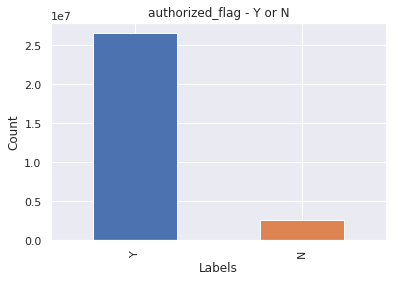

In [66]:
flag= historical_df['authorized_flag'].value_counts()
display(flag)
ax= flag.plot(kind='bar')
ax.set_xlabel("Labels")
ax.set_ylabel("Count")
plt.title("authorized_flag - Y or N")

plt.show()

It seems to be that most of the transactions are authorized and only a very small number of transactions are not authorized. We may consider to drop them later.

##### Categorical columns

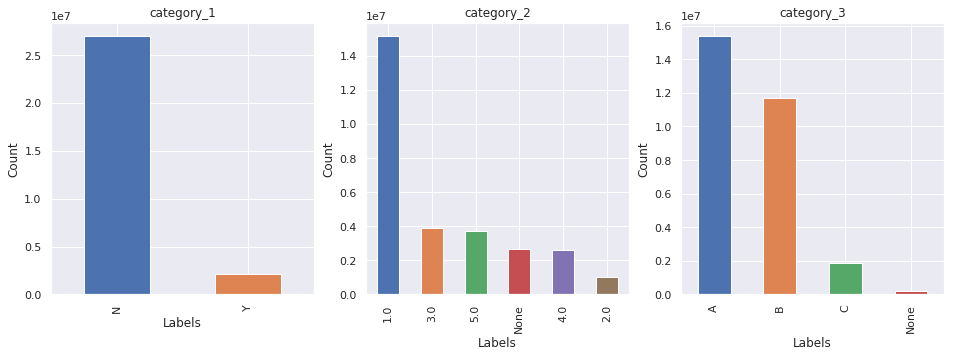

In [67]:
categ_h_1= historical_df['category_1'].value_counts()
categ_h_2= historical_df['category_2'].value_counts()
categ_h_3= historical_df['category_3'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
categ_h_1.plot.bar(ax=ax1)
ax1.set_xlabel("Labels")
ax1.set_ylabel("Count")
ax1.set_title("category_1")
categ_h_2.plot.bar(ax=ax2)
ax2.set_xlabel("Labels")
ax2.set_ylabel("Count")
ax2.set_title("category_2")
categ_h_3.plot.bar(ax=ax3)
ax3.set_xlabel("Labels")
ax3.set_ylabel("Count")
ax3.set_title("category_3")

plt.show()

All categories are quite different. Again no real interpretations possible.

##### Month lag

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


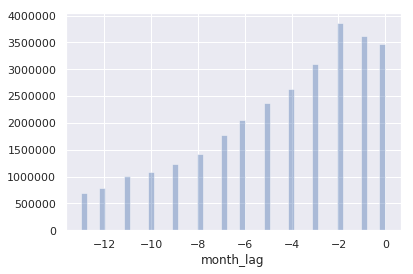

In [68]:
#f, ax = plt.subplots(figsize=(8, 8))
sns.distplot(historical_df['month_lag'],hist=True, kde=False)

plt.show()

The months lag representat the lag in months to a certain reference date. It may be linked towards how long the purchase is away from a certain reference date. 0=very recent transaction, -12 transaction 12 months ago.

##### Installments

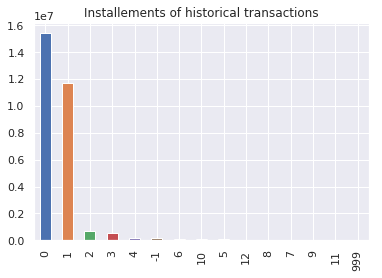

In [69]:
installments= historical_df['installments'].value_counts()
installments.plot(kind='bar')
plt.title('Installements of historical transactions')
plt.show()

If a buyer does not pay the total amount in one sum, he may align on installments, or payment rates over time. Most of the purchases happen in one sum, followed by a few with 1 installment. Others are very rare. -1 and 99 values are also very rare and will be replaced by 0, as it probably stand for not applicable.

##### City ID, Subsector ID and State ID 

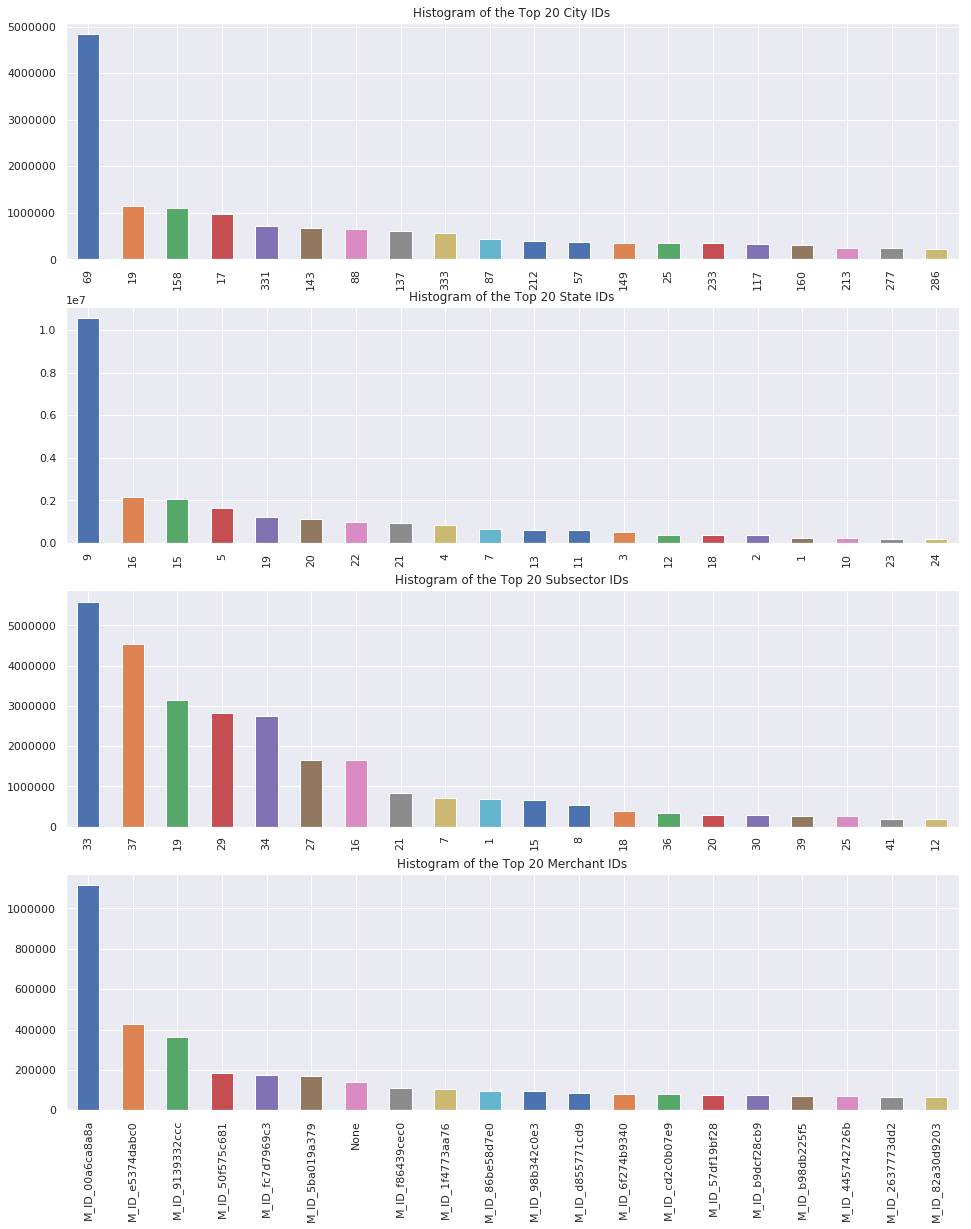

In [70]:
#count the values per category
city_id = historical_df.loc[historical_df['city_id']!='-1','city_id'].value_counts()
state_id = historical_df.loc[historical_df['state_id']!='-1','state_id'].value_counts()
subsector_id = historical_df.loc[historical_df['subsector_id']!='-1','subsector_id'].value_counts()
merchant_id = historical_df.loc[historical_df['merchant_id']!='-1','merchant_id'].value_counts()

# plot the top 20 categories
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(16,20))
city_id[:20].plot.bar(ax=ax1)
ax1.set_title('Histogram of the Top 20 City IDs')

state_id[:20].plot.bar(ax=ax2)
ax2.set_title('Histogram of the Top 20 State IDs')

subsector_id[:20].plot.bar(ax=ax3)
ax3.set_title('Histogram of the Top 20 Subsector IDs')

merchant_id[:20].plot.bar(ax=ax4)
ax4.set_title('Histogram of the Top 20 Merchant IDs')



plt.show()


The distrubution of the geographical categories as well as the merchant, look similar towards the distribution of merchants. This means most transactions happen where most of the merchants are available. The top 10 are very similar.
There is one merchant which has multiple times more transactions than others. 

##### Purchase amount

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of the purchase amount <0.5')

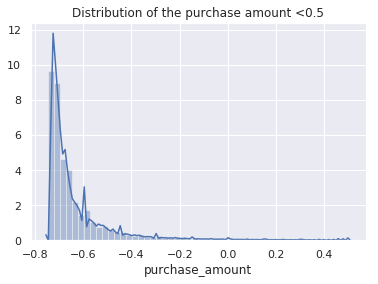

In [71]:
# Plot the distribution of the purchase amount
sns.distplot(historical_df.loc[historical_df['purchase_amount']<0.5, 'purchase_amount'])
plt.title('Distribution of the purchase amount <0.5')

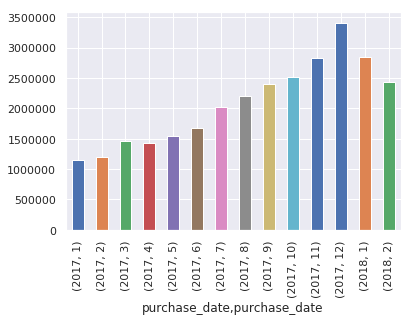

In [72]:
historical_df['purchase_date'] = pd.to_datetime(historical_df['purchase_date'])
historical_df['purchase_amount'].groupby([historical_df["purchase_date"].dt.year, historical_df["purchase_date"].dt.month]).count().plot(kind="bar")

The most number of transactions happened in the month November, December and January. The disribution looks very much the same as the moNths lag.

### 5.3 Clean and prepare transaction data for merger and aggregation

Similar to merchant data, also for the historical dataset categorical values are converted to dummies being replaced by 0 and 1 values. We do not drop the first column for category 2 and 3 as we want to see the correlation of the single value against target.

In [73]:
#historical_df.drop(historical_df[historical_df['authorized_flag'] == 'N'].index,axis=0, inplace=True)

In [74]:
# create dummies for categorical values
col = ['category_2', 'category_3']
historical_df = pd.get_dummies(historical_df, columns=col, dtype='int8')

In [75]:
# create a dummy variable for authorized flag and category 1 by mapping them reasonably
historical_df['authorized_flag'] = historical_df['authorized_flag'].map({'Y':1, 'N':0})
historical_df['category_1'] = historical_df['category_1'].map({'Y':1, 'N':0})


In [76]:
# From the exploratory analysis missing or porbably wrong values are replaced assuming 0 payment installments
replace_values(historical_df, ['installments'], -1 , 0)
replace_values(historical_df, ['installments'], 999 , 0)

### 5.4 Feature engineering

From the purchase date timestamp, we can derive several features which may be correlated with the customer loyalty. Potentially there are typical months, weekdays or hours where the loyalty is higher then in others.

## Probably have to translate it into categorical variablbes.

In [77]:
#Feature engineeing based on the purchase date - extract potential predictors
historical_df['month'] = historical_df['purchase_date'].dt.month
historical_df['dayofweek'] = historical_df['purchase_date'].dt.dayofweek
historical_df['hour'] = historical_df['purchase_date'].dt.hour
historical_df['weekend'] = (historical_df.purchase_date.dt.weekday >=5).astype(int)

In [78]:
#Calculate how many months the purcahse is from today plus the months lag
historical_df['month_diff'] = ((datetime.today() - historical_df['purchase_date']).dt.days)//30
historical_df['month_diff'] += historical_df['month_lag']

In [79]:
# Transform the purchase date int an integer
historical_df.loc[:, 'purchase_date'] = pd.DatetimeIndex(historical_df['purchase_date']).astype(np.int64) * 1e-9

Next to the purchase date we want to test if the city and subsector where most of the transations are done, are linked towards a higher loyalty score.

In [80]:
# Identify the top cities, subsectors or states
main_city = historical_df.loc[historical_df['city_id'] != '-1', 'city_id'].value_counts()[:1].index
main_sector = historical_df.loc[historical_df['subsector_id'] != '-1', 'subsector_id'].value_counts()[:2].index
main_state = historical_df.loc[historical_df['state_id'] != '-1', 'state_id'].value_counts()[:2].index
print('Top Cities', main_city, 'Top Subsectors', main_sector, 'Top States', main_state)

Top Cities CategoricalIndex(['69'], categories=['-1', '1', '10', '100', '101', '102', '103', '104', ...], ordered=False, dtype='category') Top Subsectors CategoricalIndex(['33', '37'], categories=['-1', '1', '10', '11', '12', '13', '14', '15', ...], ordered=False, dtype='category') Top States CategoricalIndex(['9', '16'], categories=['-1', '1', '10', '11', '12', '13', '14', '15', ...], ordered=False, dtype='category')


In [81]:
# Create a dummy variable for the main city
historical_df['main_city'] = np.where(historical_df['city_id'].isin(main_city), 1, 0)
# Create a dummy variable for the main subsector
historical_df['main_sector'] = np.where(historical_df['subsector_id'].isin(main_sector), 1, 0)
# Create a dummy variable for the main state
historical_df['main_state'] = np.where(historical_df['state_id'].isin(main_state), 1, 0)


### 5.5 Aggregate historical_df

##### Set up the aggregation library

For every column potential aggregation strategies are defined. For categorical values we decided to take the sum for counting the instances of that feature per card ID, the median for receiving the most frequent value (0 or 1) and the mean which is the sum of instances divided by the number of the transactions of the card user. For numerical values there are further strategies to aggregate and test upon: 'sum', 'mean','median', 'max', 'min', 'std', np.ptp is min - max.
Overall, considering different aggregation strategies for the same column may lead to collinearities depending on how the original data is distributed. We will test that later for the key features.


In [82]:
# Dictionary for aggregation of historical features
agg_func_hist = {   
    'authorized_flag':                  ['sum', 'mean', 'max'],
    'city_id':                          ['nunique'],
    'category_1':                       ['sum', 'mean', 'median'],
    'installments':                     ['sum', 'median', 'max', 'min', 'std'], 
    'merchant_category_id':             ['nunique'],
    'merchant_id':                      ['nunique'],
    'month_lag':                        ['min', 'max'],#?
    'purchase_amount':                  ['sum', 'mean','median', 'max', 'min', 'std'],
    'purchase_date':                    [np.ptp, 'max', 'min'], 
    'category_2_1.0':                   ['sum', 'mean','median'],
    'category_2_2.0':                   ['sum', 'mean','median'],
    'category_2_3.0':                   ['sum', 'mean','median'],
    'category_2_4.0':                   ['sum', 'mean','median'],
    'category_2_5.0':                   ['sum', 'mean','median'],
    'category_3_A':                     ['sum', 'mean','median'],
    'category_3_B':                     ['sum', 'mean','median'],
    'category_3_C':                     ['sum', 'mean','median'],
    'state_id':                         ['nunique'],
    'subsector_id':                     ['nunique'],
    #'weekofyear':                       ['sum', 'mean','median'],
    'month':                            ['sum', 'mean','median'],
    'dayofweek':                        ['sum', 'mean','median'],
    'hour':                             ['sum', 'mean','median'],
    'weekend':                          ['sum', 'mean','median'],
    'month_diff':                       ['mean', 'max', 'min'],
    'main_city':                        ['sum', 'max'],
    'main_sector':                      ['sum', 'max'],
    'main_state':                       ['sum', 'max']

        }

In [83]:
#Aggregate the historical dataset towards the level of card ID
agg_hist = historical_df.groupby(['card_id']).agg(agg_func_hist)

In [84]:
# Rename the columns with the prefix hist and join the column index levels
agg_hist.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_hist.columns.values]

In [85]:
# Drop all columns from the historical dataframe except for merchant and card ID for the merch with merchants dataset
historical_df.drop(historical_df.columns.difference(['merchant_id', 'card_id']),axis=1, inplace=True)
gc.collect()

15199

### 5.6 Merch merchants with historical data

After having aggregated the historical data, we can use the ID information of historical_df to merge merchant data using the merchants ID. Finally the data can be aggregated at Card ID.
Initially we had both processes integrated, but for memory saving this is split now.
Unfortunately we could not find a way to control the choice of the dataype in a join.

In [86]:
# Join historical df with merchants data
hist_merch_df=historical_df.merge(merch_df_join,how='left',on='merchant_id')
#hist_merch_df.info()

In [87]:
del historical_df # to release RAM
gc.collect()

718

### 5.7 Clean hist_merch


After the merge we clean the dataset. As merchant data was free from NAN values, the missing values here come from unmatched merchants ID. Here we can drop the nan values. As imputing them would not bring any added value.

In [88]:
#show missing values
hist_merch_df.isnull().sum().sort_values(ascending=False)

numerical_2                      5007295
numerical_1                      5007295
active_months_lag12              5007295
active_months_lag3               5007295
active_months_lag6               5007295
avg_purchases_lag12              5007295
avg_purchases_lag3               5007295
avg_purchases_lag6               5007295
avg_sales_lag12                  5007295
avg_sales_lag3                   5007295
avg_sales_lag6                   5007295
category_4                       5007295
merchant_group_id                5007295
most_recent_purchases_range_A    5007295
most_recent_purchases_range_B    5007295
most_recent_purchases_range_C    5007295
most_recent_purchases_range_D    5007295
most_recent_purchases_range_E    5007295
most_recent_sales_range_A        5007295
most_recent_sales_range_B        5007295
most_recent_sales_range_C        5007295
most_recent_sales_range_D        5007295
most_recent_sales_range_E        5007295
merchant_id                            0
card_id         

In [89]:
# drop rows with missing values
hist_merch_df.dropna(inplace=True)

In [90]:
#hist_merch_df.isnull().sum().sort_values(ascending=False)

### 5.8 Aggregate

As already described for the first aggregation, we will use sum, mean and median for categorial dummy variables. For numerical values a wider range of aggregation strategies can be used. Here we will look and the sum, the median, the mean, the min and the max of the data aggregated per card ID.

In [91]:
# Dictionary for aggregation of historical merchant features
agg_func_merch = {    
    'active_months_lag12':              ['sum', 'mean','median', 'max', 'min', 'std'],
    'active_months_lag3':               ['sum', 'mean','median', 'max', 'min', 'std'],
    'avg_purchases_lag12':              ['sum', 'mean','median', 'max', 'min', 'std'],
    'active_months_lag6':               ['sum', 'mean','median', 'max', 'min', 'std'],
    'avg_purchases_lag3':               ['sum', 'mean','median', 'max', 'min', 'std'],
    'avg_purchases_lag6':               ['sum', 'mean','median', 'max', 'min', 'std'],
    'avg_sales_lag12':                  ['sum', 'mean','median', 'max', 'min', 'std'],
    'avg_sales_lag3':                   ['sum', 'mean','median', 'max', 'min', 'std'],
    'avg_sales_lag6':                   ['sum', 'mean','median', 'max', 'min', 'std'],
    'category_4':                       ['sum', 'mean', 'median'],
    'merchant_group_id':                ['nunique'],
    'most_recent_purchases_range_A':    ['sum', 'mean','median'],
    'most_recent_purchases_range_B':    ['sum', 'mean','median'],
    'most_recent_purchases_range_C':    ['sum', 'mean','median'],
    'most_recent_purchases_range_D':    ['sum', 'mean','median'],
    'most_recent_purchases_range_E':    ['sum', 'mean','median'],
    'most_recent_sales_range_A':        ['sum', 'mean','median'],
    'most_recent_sales_range_B':        ['sum', 'mean','median'],
    'most_recent_sales_range_C':        ['sum', 'mean','median'],
    'most_recent_sales_range_D':        ['sum', 'mean','median'],
    'most_recent_sales_range_E':        ['sum', 'mean','median'],
    'numerical_1':                      ['sum', 'mean','median', 'max', 'min', 'std'],
    'numerical_2':                      ['sum', 'mean','median', 'max', 'min', 'std']
  }

##### Aggreagte hist_merch dataset

In [92]:
# aggregate merchants information of historical transactions.
agg_hist_merch = hist_merch_df.groupby(['card_id']).agg(agg_func_merch)

In [93]:
#  Rename the columns with a prefix hist and integrate the information of the column index to one level
agg_hist_merch.columns = ['hist_' + '_'.join(col).strip() 
                           for col in agg_hist_merch.columns.values]

In [94]:
#print(agg_hist_merch.info())
#agg_hist_merch.head()

In [95]:
del hist_merch_df # Delete hist_merch_df to clean RAM
gc.collect()

388

## 6. Explore new transactions

After having explored and aggregated historical data, the similar procedure is done for new transactions.
If the datasets were smaller a parallel assessment would be preferred to compare the data easier, find common patters or differences, which may be used for further feature engineering.

In [96]:
# load the new datasest
new_df=pd.read_csv("../loecher/public/new_merchant_transactions.csv.gz", dtype=dtypesDict_hist_new, parse_dates=['purchase_date'])

In [97]:
# First exploration of the new_df set.
print('The shape of the train set is: ', new_df.shape, '\n')
print(new_df.info())
print(new_df.describe())
new_df.head(10)

The shape of the train set is:  (1963031, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         category
card_id                 category
city_id                 category
category_1              category
installments            int16
category_3              category
merchant_category_id    category
merchant_id             category
month_lag               int8
purchase_amount         float32
purchase_date           datetime64[ns]
category_2              float16
state_id                category
subsector_id            category
dtypes: category(9), datetime64[ns](1), float16(1), float32(1), int16(1), int8(1)
memory usage: 87.6 MB
None
       installments     month_lag  purchase_amount  category_2
count  1.963031e+06  1.963031e+06     1.963031e+06   1851286.0
mean   6.829643e-01  1.476515e+00    -5.509691e-01         NaN
std    1.584069e+00  4.994483e-01     6.940042e-01         0.0
min   -1.000000e+00

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,2018-03-17 18:10:41,1.0,9,15


The statistical summary shows again -1 and 999 values for the installments as well as missing values for IDs.
The purchase amount is already normalized and is here not as extreme, it has however a much stronger standard deviation. There are again some NAN values for category 2.

### 6.1 Missing Values 

In [98]:
#check for missing values
missing_values_table(new_df)

category_2     5.7
category_3     2.8
merchant_id    1.3
dtype: float64

Similar to the historical dataset, category 2, category 3 and merchant IDs are missing. 
The missing merchant IDs will also lead to missing matches when joining with merchant data.

In [99]:
# Replace category 2 and 3 by None 
columns= ['category_2', 'category_3']
replace_values(new_df, columns, np.nan, 'None')

In [100]:
missing_id_values(new_df,id_columns)

city_id :  5.1 %
state_id :  5.7 %
subsector_id :  0.0 %
merchant_id :  0.0 %
merchant_category_id :  0.0 %


Next to that the following ID columns have missing values represented by -1. 5% we still consider as being acceptable, so that we do not drop the column. In addition, we will not change anything as this is the typical variable for missing values for a categorical datatype. -1 will likewise 'none' not match with merchants data.

In [101]:
#missing_values_table(new_df)

### 6.2 Visually explore new dataset

##### Authorized flag

Y    1963031
Name: authorized_flag, dtype: int64

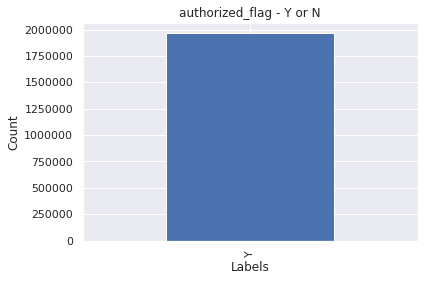

In [102]:
flag= new_df['authorized_flag'].value_counts()
display(flag)
ax= flag.plot(kind='bar')
ax.set_xlabel("Labels")
ax.set_ylabel("Count")
plt.title("authorized_flag - Y or N")

plt.show()

Unlike for historical transactions, all new transactions where successful. We can thus remove this variable from our predictors.

##### Categorical columns

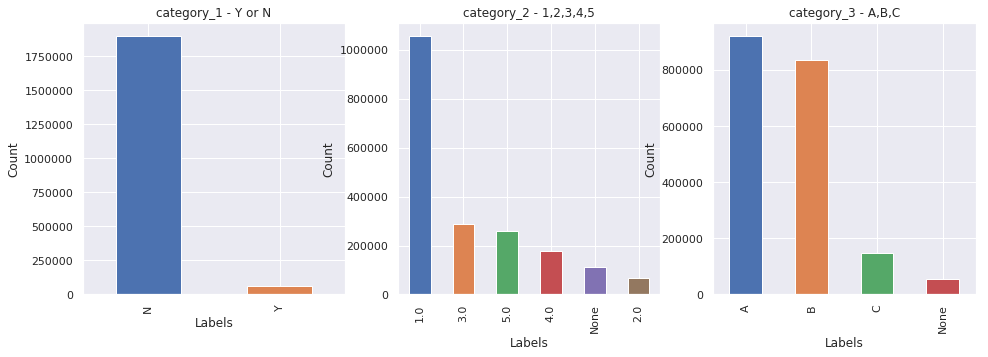

In [103]:
categ_n_1= new_df['category_1'].value_counts()
categ_n_2= new_df['category_2'].value_counts()
categ_n_3= new_df['category_3'].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))
categ_n_1.plot.bar(ax=ax1)
ax1.set_xlabel("Labels")
ax1.set_ylabel("Count")
ax1.set_title("category_1 - Y or N")

categ_n_2.plot.bar(ax=ax2)
ax2.set_xlabel("Labels")
ax2.set_ylabel("Count")
ax2.set_title("category_2 - 1,2,3,4,5")

categ_n_3.plot.bar(ax=ax3)
ax3.set_xlabel("Labels")
ax3.set_ylabel("Count")
ax3.set_title("category_3 - A,B,C")

plt.show()

The distribution of historical transactions is very similar to the distribution of new transactions. 
The share of 'N' for category 1 is even stronger than past transactions. 
Others look very comparable.

##### Month lag

Text(0.5,1,'Months lag new transactions')

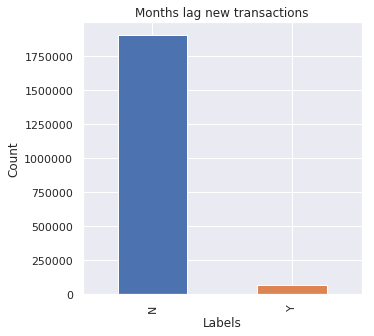

In [104]:
#f, ax = plt.subplots(figsize=(8, 8))
month_lag= new_df['month_lag'].value_counts()

fig, (ax1) = plt.subplots(1,1, figsize=(5,5))
categ_n_1.plot.bar(ax=ax1)
ax1.set_xlabel("Labels")
ax1.set_ylabel("Count")
ax1.set_title("Months lag new transactions")

The months lag for new transcations lies between 1 or 2 months. 

##### Installments

Text(0.5,1,'Installements of new transactions')

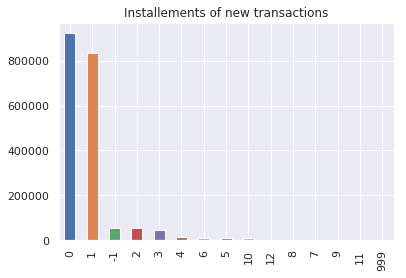

In [105]:
installments= new_df['installments'].value_counts()
installments.plot(kind='bar')
plt.title('Installements of new transactions')

Clearly, the most typical installment is either direct payment or 1 installment. The distribution looks very similar towards historical_df. 
High installment payments may also be linked to higher loyalty of the customer.

##### City ID, Subsector ID and State ID

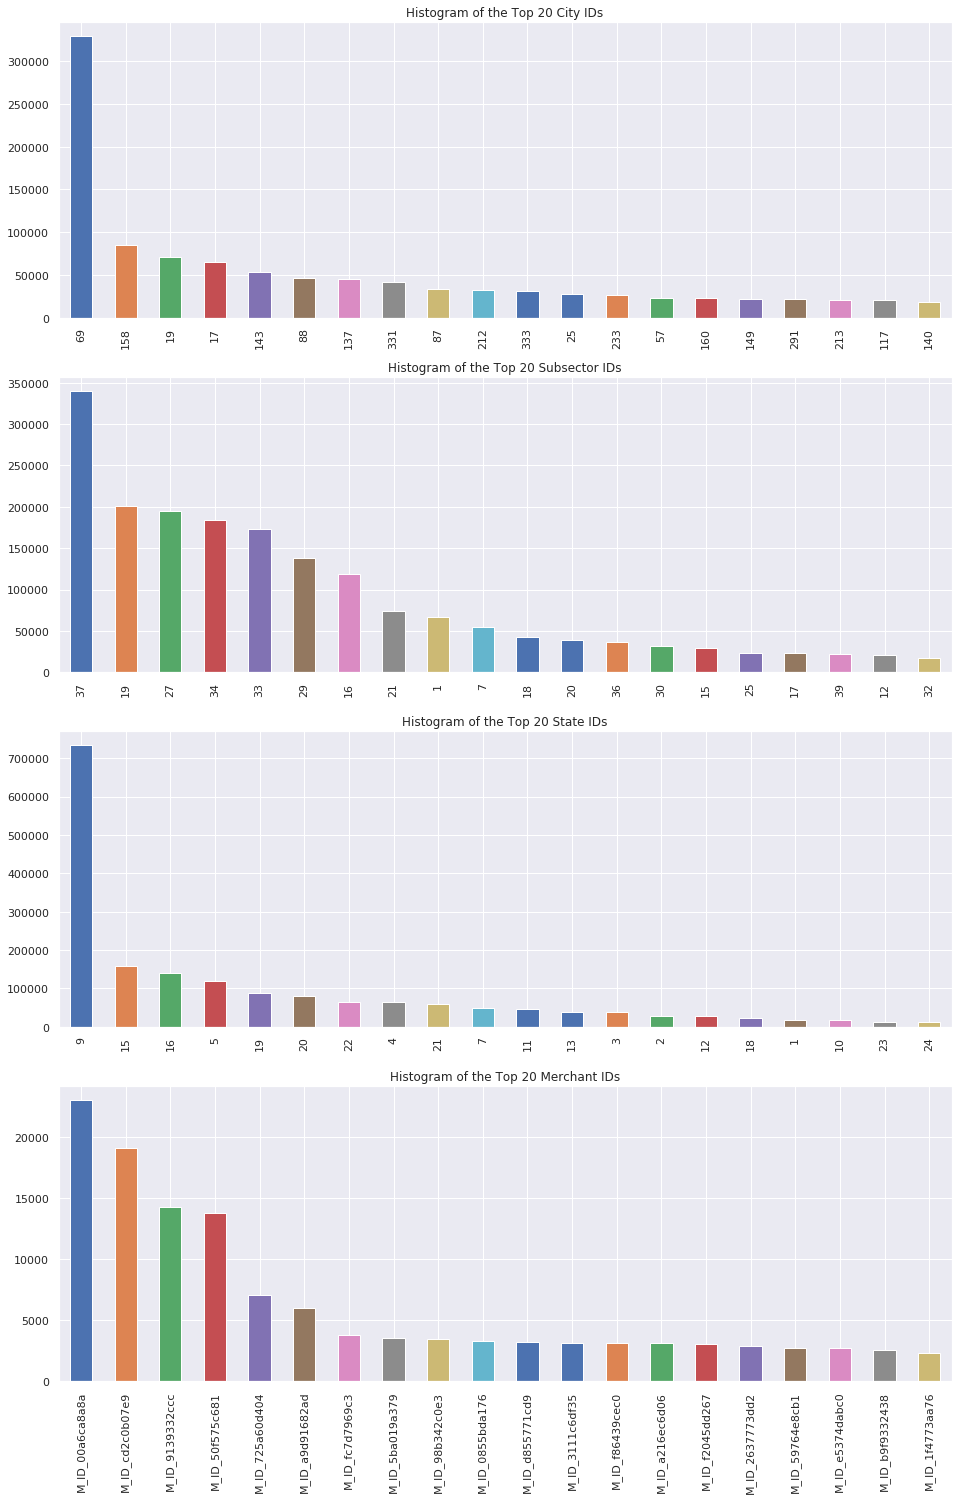

In [106]:
city_id = new_df.loc[new_df['city_id']!='-1','city_id'].value_counts()
state_id = new_df.loc[new_df['state_id']!='-1','state_id'].value_counts()
subsector_id = new_df.loc[new_df['subsector_id']!='-1','subsector_id'].value_counts()
merchant_id = new_df.loc[new_df['merchant_id']!='-1','merchant_id'].value_counts()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(16,25))
city_id[:20].plot.bar(ax=ax1)
ax1.set_title('Histogram of the Top 20 City IDs')

subsector_id[:20].plot.bar(ax=ax2)
ax2.set_title('Histogram of the Top 20 Subsector IDs')

state_id[:20].plot.bar(ax=ax3)
ax3.set_title('Histogram of the Top 20 State IDs')


merchant_id[:20].plot.bar(ax=ax4)
ax4.set_title('Histogram of the Top 20 Merchant IDs')



plt.show()



Again, there are very similar cities under the top 10. The main state and city are identical, having clearly the most transactions.

##### Purchase amount

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of the purchase amount <0.5')

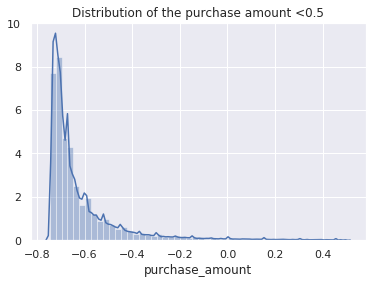

In [107]:
# Plot the distribution of the purchase amount
sns.distplot(new_df.loc[new_df['purchase_amount']<0.5, 'purchase_amount'])
plt.title('Distribution of the purchase amount <0.5')

Text(0.5,1,'Distribution of the purchase amount over the purchase date')

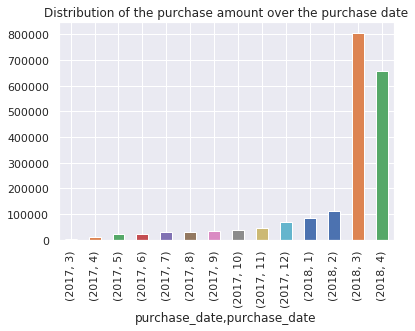

In [108]:
new_df['purchase_date'] = pd.to_datetime(new_df['purchase_date'])
new_df['purchase_amount'].groupby([new_df["purchase_date"].dt.year, new_df["purchase_date"].dt.month]).count().plot(kind="bar")

plt.title('Distribution of the purchase amount over the purchase date')

### 6.3 Clean and prepare transaction data for merger and aggregation

Same as historical data categorical values are converted to dummies being replaced by 0 and 1 values. We do not drop the one column for category 2 and 3 as we want to see the correlation of the single value against target.

In [109]:
# Define dummies for categorical values
col = ['category_2', 'category_3']
new_df = pd.get_dummies(new_df, columns=col, dtype='int8')

In [110]:
#Map dummy values resonably for category 1
new_df['category_1'] = new_df['category_1'].map({'Y':1, 'N':0})

In [111]:
# From the exploratory analysis missing or porbably wrong values are replacced assuming 0 payment installments
replace_values(new_df, ['installments'], -1 , 0)
replace_values(new_df, ['installments'], 999 , 0)

### 6.4 Feature engineering

From the purchase date timestamp, we can derive several features which may be correlated with the customer loyalty. Potentially there are typical months, weekdays or hours where the loyalty is higher than in others.

In [112]:
#Feature engineeing based on the purchase date - extract potential predictors
new_df['month'] = new_df['purchase_date'].dt.month
new_df['dayofweek'] = new_df['purchase_date'].dt.dayofweek
new_df['hour'] = new_df['purchase_date'].dt.hour
new_df['weekend'] = (new_df.purchase_date.dt.weekday >=5).astype(int)
new_df['month_diff'] = ((datetime.today() - new_df['purchase_date']).dt.days)//30
new_df['month_diff'] += new_df['month_lag']
    

In [113]:
# Tranform the purchase date to integer
new_df.loc[:, 'purchase_date'] = pd.DatetimeIndex(new_df['purchase_date']).astype(np.int64) * 1e-9

Next to the purchase date we want to test if the city and subsector where most of the transactions are done, are linked towards a higher loyalty score. As it makes no real sense to convert all IDs into categorical values (both because of size, calculation time and loads of probably not fitting columns), we check first with the main ones.

In [114]:
main_city = new_df.loc[new_df['city_id'] != '-1', 'city_id'].value_counts()[:1].index
main_sector = new_df.loc[new_df['subsector_id'] != '-1', 'subsector_id'].value_counts()[:2].index
main_state = new_df.loc[new_df['state_id'] != '-1', 'state_id'].value_counts()[:2].index
main_merchant = new_df.loc[new_df['state_id'] != '-1', 'state_id'].value_counts()[:5].index
print('Top Cities', main_city, 'Top Subsectors', main_sector, 'Top States', main_state)

Top Cities CategoricalIndex(['69'], categories=['-1', '1', '10', '100', '101', '102', '103', '104', ...], ordered=False, dtype='category') Top Subsectors CategoricalIndex(['37', '19'], categories=['-1', '1', '10', '11', '12', '13', '14', '15', ...], ordered=False, dtype='category') Top States CategoricalIndex(['9', '15'], categories=['-1', '1', '10', '11', '12', '13', '14', '15', ...], ordered=False, dtype='category')


In [115]:
# Create a dummy variable for the main city
new_df['main_city'] = np.where(new_df['city_id'].isin(main_city), 1, 0)
# Create a dummy variable for the main subsectors
new_df['main_sector'] = np.where(new_df['subsector_id'].isin(main_sector), 1, 0)
# Create a dummy variable for the main states
new_df['main_state'] = np.where(new_df['state_id'].isin(main_state), 1, 0)
# Create a dummy variable for the main merchants
new_df['main_merchant'] = np.where(new_df['merchant_id'].isin(main_merchant), 1, 0)


### 6.5 Aggregation

##### Set up the aggregation library

Same as for historical data, aggregation strategies are defined. For more information see above.
[5.5 Aggregate historical_df](#5.5-Aggregate-historical_df)

In [116]:
# Dictionary for aggregation of new features
agg_func_new = {   
    'city_id':                          ['nunique'],
    'category_1':                       ['sum', 'mean', 'median'],
    'installments':                     ['sum', 'median', 'max', 'min', 'std'], 
    'merchant_category_id':             ['nunique'],
    'merchant_id':                      ['nunique'],
    'month_lag':                        ['min', 'max'],#?
    'purchase_amount':                  ['sum', 'mean','median', 'max', 'min', 'std'],
    'purchase_date':                    [np.ptp, 'max', 'min'], 
    'category_2_1.0':                   ['sum', 'mean','median'],
    'category_2_2.0':                   ['sum', 'mean','median'],
    'category_2_3.0':                   ['sum', 'mean','median'],
    'category_2_4.0':                   ['sum', 'mean','median'],
    'category_2_5.0':                   ['sum', 'mean','median'],
    'category_3_A':                     ['sum', 'mean','median'],
    'category_3_B':                     ['sum', 'mean','median'],
    'category_3_C':                     ['sum', 'mean','median'],
    'state_id':                         ['nunique'],
    'subsector_id':                     ['nunique'],
    #'weekofyear':                       ['sum', 'mean','median'],
    'month':                            ['sum', 'mean','median'],
    'dayofweek':                        ['sum', 'mean','median'],
    'hour':                             ['sum', 'mean','median'],
    'weekend':                          ['sum', 'mean','median'],
    'month_diff':                       ['mean', 'max', 'min'],
    'main_city':                        ['sum', 'max'],
    'main_sector':                        ['sum', 'max'],
    'main_state':                        ['sum', 'max'], 
    'main_merchant':                    ['sum', 'max']

        }

In [117]:
# Aggregate by card_ID
agg_new = new_df.groupby(['card_id']).agg(agg_func_new)

In [118]:
# Rename columns and join column index levels 
agg_new.columns = ['new_' + '_'.join(col).strip() 
                           for col in agg_new.columns.values]

In [119]:
# Drop all columns except card_ID and Merchant_ID for merging with merchant dataset
new_df.drop(new_df.columns.difference(['merchant_id', 'card_id']),axis=1, inplace=True)
gc.collect()

118

### 6.6 Merge merchants with new data


In [120]:
# join new transactions with merchants data
new_merch_df=new_df.merge(merch_df_join,how='left',on='merchant_id')
#print(new_merch_df.info())
new_merch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991627 entries, 0 to 1991626
Data columns (total 25 columns):
card_id                          category
merchant_id                      object
active_months_lag12              float64
active_months_lag3               float64
active_months_lag6               float64
avg_purchases_lag12              float64
avg_purchases_lag3               float64
avg_purchases_lag6               float64
avg_sales_lag12                  float32
avg_sales_lag3                   float32
avg_sales_lag6                   float32
category_4                       float64
merchant_group_id                category
most_recent_purchases_range_A    float64
most_recent_purchases_range_B    float64
most_recent_purchases_range_C    float64
most_recent_purchases_range_D    float64
most_recent_purchases_range_E    float64
most_recent_sales_range_A        float64
most_recent_sales_range_B        float64
most_recent_sales_range_C        float64
most_recent_sales_range_D

In [121]:
del new_df # to release RAM
gc.collect()

303

In [122]:
#new_merch_df.isnull().sum().sort_values(ascending=False)

### 6.7 Clean new_merch


Same as for historical transactions where merchant ID is missing, we can also drop NA values for new_merch_df. As merchants dataset was free from missing values, the nan values can only come from merchant ID mismatch.

In [123]:
# Inspect the number of missing values after join
new_merch_df.isnull().sum().sort_values(ascending=False)

numerical_2                      300935
numerical_1                      300935
active_months_lag12              300935
active_months_lag3               300935
active_months_lag6               300935
avg_purchases_lag12              300935
avg_purchases_lag3               300935
avg_purchases_lag6               300935
avg_sales_lag12                  300935
avg_sales_lag3                   300935
avg_sales_lag6                   300935
category_4                       300935
merchant_group_id                300935
most_recent_purchases_range_A    300935
most_recent_purchases_range_B    300935
most_recent_purchases_range_C    300935
most_recent_purchases_range_D    300935
most_recent_purchases_range_E    300935
most_recent_sales_range_A        300935
most_recent_sales_range_B        300935
most_recent_sales_range_C        300935
most_recent_sales_range_D        300935
most_recent_sales_range_E        300935
merchant_id                       26216
card_id                               0


In [124]:
#Drop missing rows
new_merch_df.dropna(inplace=True)

### 6.8 Aggregate

See [5.8 Aggregate](#5.8-Aggregate)

##### Aggreagte new_merch dataset

In [125]:
# aggregate merchants information of new transactions.
agg_new_merch = new_merch_df.groupby(['card_id']).agg(agg_func_merch)

In [126]:
#  Rename the columns with a prefix new and integrate the information of the column index to one level
agg_new_merch.columns = ['new_' + '_'.join(col).strip() 
                           for col in agg_new_merch.columns.values]

In [127]:
print(agg_new_merch.info())
agg_new_merch.head()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 290001 entries, C_ID_0001238066 to C_ID_fffffd5772
Data columns (total 100 columns):
new_active_months_lag12_sum                 290001 non-null float64
new_active_months_lag12_mean                280781 non-null float64
new_active_months_lag12_median              280781 non-null float64
new_active_months_lag12_max                 280781 non-null float64
new_active_months_lag12_min                 280781 non-null float64
new_active_months_lag12_std                 233500 non-null float64
new_active_months_lag3_sum                  290001 non-null float64
new_active_months_lag3_mean                 280781 non-null float64
new_active_months_lag3_median               280781 non-null float64
new_active_months_lag3_max                  280781 non-null float64
new_active_months_lag3_min                  280781 non-null float64
new_active_months_lag3_std                  233500 non-null float64
new_avg_purchases_lag12_sum                

,new_active_months_lag12_sum,new_active_months_lag12_mean,new_active_months_lag12_median,new_active_months_lag12_max,new_active_months_lag12_min,new_active_months_lag12_std,new_active_months_lag3_sum,new_active_months_lag3_mean,new_active_months_lag3_median,new_active_months_lag3_max,...,new_numerical_1_median,new_numerical_1_max,new_numerical_1_min,new_numerical_1_std,new_numerical_2_sum,new_numerical_2_mean,new_numerical_2_median,new_numerical_2_max,new_numerical_2_min,new_numerical_2_std
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_0001238066,280.0,11.666667,12.0,12.0,7.0,1.090140,72.0,3.0,3.0,3.0,...,-0.047546,1.866211,-0.057465,0.389893,0.673340,0.028061,-0.057465,1.866211,-0.057465,0.391602
C_ID_0001793786,294.0,11.760000,12.0,12.0,9.0,0.723418,75.0,3.0,3.0,3.0,...,-0.047546,1.845703,-0.057465,0.378662,0.813965,0.032562,-0.057465,1.806641,-0.057465,0.371094
C_ID_0009150c11,85.0,10.625000,12.0,12.0,6.0,2.559994,24.0,3.0,3.0,3.0,...,-0.057465,0.577148,-0.057465,0.227417,0.184814,0.023102,-0.057465,0.388672,-0.057465,0.163208
C_ID_003e56029c,144.0,12.000000,12.0,12.0,12.0,0.000000,36.0,3.0,3.0,3.0,...,-0.047546,0.319336,-0.057465,0.119263,-0.054993,-0.004581,-0.052490,0.319336,-0.057465,0.119202
C_ID_006005dd0a,36.0,12.000000,12.0,12.0,12.0,0.000000,9.0,3.0,3.0,3.0,...,0.031769,0.180542,-0.047546,0.115784,-0.083130,-0.027725,-0.057465,0.031769,-0.057465,0.051514


In [128]:
del new_merch_df # Release RAM
gc.collect()

321

## 7. Merge aggregated feature with train and test set

Finally, all datasets are ready for merging with train and test data. To avoid double processing, we concatenate train and test set together. This allows also a common scaling of train and test data. After the common processing they can be easily split again into train and test dataset.

### 7.1 Concatenate train and testset

In [129]:
#Load train and test datset
train_df =  pd.read_csv("../loecher/public/train.csv.gz", parse_dates=['first_active_month'])
test_df = pd.read_csv("../loecher/public/test.csv.gz",parse_dates=['first_active_month'])

In [130]:
# Concatenate train and test set to joined_df
joined_df =  pd.concat((train_df.loc[:, train_df.columns != 'target'], test_df),sort=False,  axis=0)
#joined_df.info()

In [131]:
#Transform the first active months of a card to integer
joined_df.loc[:, 'first_active_month'] = pd.DatetimeIndex(joined_df['first_active_month']).\
                                      astype(np.int64) * 1e-9

In [132]:
del test_df # remove testset as it will not be needed anymore
gc.collect()

702

### 7.2 Merge aggregated historical features to the joined train-test set

First we will join the aggregated historical transaction features with the joined_df, followed by the join with the related merchants data.

In [133]:
# Merge the joined_df with aggreated historical transaction data, use left join to keep all keys of joined df
joined_df = joined_df.merge(agg_hist,how='left',on='card_id')
#print(joined_df.info())
#joined_df.head()

In [134]:
# Merge the joined_df with aggreated historical transaction merchant data, use left join to keep all keys of joined df
joined_df = joined_df.merge(agg_hist_merch,how='left',on='card_id')
#print(joined_df.info())
#joined_df.head()

In [135]:
# describe joined_df to have a look at the summary statistics
joined_df.describe()

,first_active_month,feature_1,feature_2,feature_3,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_authorized_flag_max,hist_city_id_nunique,hist_category_1_sum,hist_category_1_mean,...,hist_numerical_1_median,hist_numerical_1_max,hist_numerical_1_min,hist_numerical_1_std,hist_numerical_2_sum,hist_numerical_2_mean,hist_numerical_2_median,hist_numerical_2_max,hist_numerical_2_min,hist_numerical_2_std
count,3.255400e+05,325540.00000,325540.000000,325540.000000,325540.000000,325540.000000,325540.0,325540.000000,325540.000000,325540.000000,...,325409.000000,325409.000000,325409.000000,325214.000000,325540.000000,325409.000000,325409.000000,325409.000000,325409.000000,325214.000000
mean,1.484436e+09,3.10681,1.744038,0.565116,81.696418,0.893224,1.0,4.905366,6.401760,0.101041,...,-0.000000,NaN,-0.000000,NaN,NaN,0.000000,-0.000000,NaN,-0.000000,NaN
std,3.153192e+07,1.18728,0.750540,0.495742,99.797158,0.114473,0.0,3.493463,22.037265,0.208026,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
min,-9.223372e+09,1.00000,1.000000,0.000000,2.000000,0.030488,1.0,1.000000,0.000000,0.000000,...,-0.057465,-0.057465,-0.057465,0.000000,-283.250000,-0.057465,-0.057465,-0.057465,-0.057465,0.000000
25%,1.475280e+09,2.00000,1.000000,0.000000,23.000000,0.852941,1.0,3.000000,0.000000,0.000000,...,-0.057465,0.586914,-0.057465,0.148193,-1.018555,-0.035004,-0.057465,0.259766,-0.057465,0.068848
50%,1.491005e+09,3.00000,2.000000,1.000000,48.000000,0.926829,1.0,4.000000,0.000000,0.000000,...,-0.047546,1.250977,-0.057465,0.273926,0.230957,0.005501,-0.057465,1.102539,-0.057465,0.219849
75%,1.504224e+09,4.00000,2.000000,1.000000,100.000000,0.972603,1.0,6.000000,5.000000,0.090909,...,-0.037628,1.727539,-0.057465,0.394775,3.703125,0.070801,-0.057465,1.707031,-0.057465,0.356934
max,1.517443e+09,5.00000,3.000000,1.000000,4122.000000,1.000000,1.0,95.000000,5579.000000,1.000000,...,2.035156,2.035156,1.995117,1.409180,896.000000,1.955078,2.003906,2.003906,1.955078,1.402344


### 7.3 Merge aggregated new features to the joined train-test set

After the historical features were added, the new transaction features follow.

In [136]:
# Merge the joined_df with aggreated new transaction data, use left join to keep all keys of joined df
joined_df = joined_df.merge(agg_new,how='left',on='card_id')
print(joined_df.info())
joined_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325540 entries, 0 to 325539
Columns: 248 entries, first_active_month to new_main_merchant_max
dtypes: float16(12), float32(30), float64(176), int16(3), int64(24), int8(2), object(1)
memory usage: 548.9+ MB
None


,first_active_month,card_id,feature_1,feature_2,feature_3,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_authorized_flag_max,hist_city_id_nunique,hist_category_1_sum,...,new_month_diff_max,new_month_diff_min,new_main_city_sum,new_main_city_max,new_main_sector_sum,new_main_sector_max,new_main_state_sum,new_main_state_max,new_main_merchant_sum,new_main_merchant_max
0,1.496275e+09,C_ID_92a2005557,5,2,1,247,0.950000,1,7,0,...,12.0,11.0,19.0,1.0,13.0,1.0,23.0,1.0,0.0,0.0
1,1.483229e+09,C_ID_3d0044924f,4,1,0,339,0.968571,1,9,31,...,13.0,12.0,6.0,1.0,4.0,1.0,6.0,1.0,0.0,0.0
2,1.470010e+09,C_ID_d639edf6cd,2,2,0,41,0.953488,1,5,0,...,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.504224e+09,C_ID_186d6a6901,4,3,0,77,1.000000,1,7,12,...,12.0,11.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
4,1.509494e+09,C_ID_cdbd2c0db2,1,3,0,128,0.962406,1,6,15,...,12.0,11.0,2.0,1.0,21.0,1.0,2.0,1.0,0.0,0.0


In [137]:
# Merge the joined_df with aggreated new transaction merchant data, use left join to keep all keys of joined df
joined_df = joined_df.merge(agg_new_merch,how='left',on='card_id')
print(joined_df.info())
joined_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325540 entries, 0 to 325539
Columns: 348 entries, first_active_month to new_numerical_2_std
dtypes: float16(24), float32(48), float64(246), int16(3), int64(24), int8(2), object(1)
memory usage: 752.6+ MB
None


,first_active_month,card_id,feature_1,feature_2,feature_3,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_authorized_flag_max,hist_city_id_nunique,hist_category_1_sum,...,new_numerical_1_median,new_numerical_1_max,new_numerical_1_min,new_numerical_1_std,new_numerical_2_sum,new_numerical_2_mean,new_numerical_2_median,new_numerical_2_max,new_numerical_2_min,new_numerical_2_std
0,1.496275e+09,C_ID_92a2005557,5,2,1,247,0.950000,1,7,0,...,-0.017807,0.507812,-0.057465,0.157349,0.173218,0.010193,-0.047546,0.507812,-0.057465,0.157837
1,1.483229e+09,C_ID_3d0044924f,4,1,0,339,0.968571,1,9,31,...,-0.037628,0.051605,-0.057465,0.043579,-0.148560,-0.029709,-0.037628,0.021851,-0.057465,0.030869
2,1.470010e+09,C_ID_d639edf6cd,2,2,0,41,0.953488,1,5,0,...,-0.027725,-0.027725,-0.027725,NaN,-0.037628,-0.037628,-0.037628,-0.037628,-0.037628,NaN
3,1.504224e+09,C_ID_186d6a6901,4,3,0,77,1.000000,1,7,12,...,-0.037628,0.834961,-0.057465,0.335449,0.946289,0.135132,-0.037628,0.795410,-0.057465,0.321777
4,1.509494e+09,C_ID_cdbd2c0db2,1,3,0,128,0.962406,1,6,15,...,-0.047546,1.916016,-0.057465,0.415039,1.857422,0.059906,-0.057465,1.895508,-0.057465,0.388672


In [138]:
# Deleted datasets which are not needed anymore
del agg_hist
del agg_hist_merch
del agg_new
del agg_new_merch
gc.collect()

153

### 7.4 Cleanse train and test set

After the join of the four Tables with the train and test set there may be missing values when there were no historical or new transactions of a certain card. As we know from the exploratory data analysis that the data may be affected by outliers and we do not know the exact impact on the aggregations, we choose the median as robust replacement for missing values.

In [139]:
#check the datatypes in joined_df
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325540 entries, 0 to 325539
Columns: 348 entries, first_active_month to new_numerical_2_std
dtypes: float16(24), float32(48), float64(246), int16(3), int64(24), int8(2), object(1)
memory usage: 752.6+ MB


In [140]:
# Calculate missing values
msng = missing_values_table(joined_df)
msng

new_numerical_2_std                          28.3
new_active_months_lag12_std                  28.3
new_active_months_lag6_std                   28.3
new_avg_purchases_lag6_std                   28.3
new_avg_purchases_lag12_std                  28.3
new_active_months_lag3_std                   28.3
new_avg_sales_lag12_std                      28.3
new_avg_purchases_lag3_std                   28.3
new_avg_sales_lag3_std                       28.3
new_numerical_1_std                          28.3
new_avg_sales_lag6_std                       28.3
new_purchase_amount_std                      24.1
new_installments_std                         24.1
new_avg_sales_lag6_mean                      13.7
new_avg_purchases_lag6_mean                  13.7
new_avg_purchases_lag6_median                13.7
new_avg_purchases_lag6_max                   13.7
new_avg_purchases_lag6_min                   13.7
new_avg_sales_lag3_max                       13.7
new_avg_sales_lag3_median                    13.7


In [141]:
# replace the NaN values with the median to continue
numerical = joined_df.select_dtypes(include=['float16','float32','float64', 'int8','int16','int32','int64', 'uint8']).columns
for x in numerical:
    joined_df[x].fillna(joined_df[x].median(),inplace=True)

In [142]:
# Calculate missing values
msng = missing_values_table(joined_df)
msng

Series([], dtype: float64)

In [143]:
#reduce memory
joined_df = reduce_mem_usage(joined_df)

Mem. usage decreased to 223.84 Mb (70.3% reduction)


## 8. First inspection of correlations between train data and the target variable

Before going over to the modelling and prediction of X_test, we would like to check potential correlations between the train data and the target variable. Therefore, we first split out joined_df into the train and test set using the length of the train data. Then we calculate the correlation matrix. We first check on which variables have the highest correlation with the target variable. Those with highest correlation will be visualized and tested on collinearity.

In [144]:
#inspect the length of the train_df
len(train_df)

201917

In [145]:
# Define X for training by splitting joined_df on the length of the trainset
X = joined_df.iloc[0:len(train_df),:]

# Extract Y for training  from the train dataset 
y = train_df.loc[:,'target']

# Concatenate X and Y for correlation calculation
X_y = pd.concat([X,y], axis=1)


In [146]:
# look at the head() of the X_y dataset
X_y.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_authorized_flag_max,hist_city_id_nunique,hist_category_1_sum,...,new_numerical_1_max,new_numerical_1_min,new_numerical_1_std,new_numerical_2_sum,new_numerical_2_mean,new_numerical_2_median,new_numerical_2_max,new_numerical_2_min,new_numerical_2_std,target
0,1.496275e+09,C_ID_92a2005557,5,2,1,247,0.950195,1,7,0,...,0.507812,-0.057465,0.157349,0.173218,0.010193,-0.047546,0.507812,-0.057465,0.157837,-0.820283
1,1.483229e+09,C_ID_3d0044924f,4,1,0,339,0.968750,1,9,31,...,0.051605,-0.057465,0.043579,-0.148560,-0.029709,-0.037628,0.021851,-0.057465,0.030869,0.392913
2,1.470010e+09,C_ID_d639edf6cd,2,2,0,41,0.953613,1,5,0,...,-0.027725,-0.027725,0.143799,-0.037628,-0.037628,-0.037628,-0.037628,-0.037628,0.064453,0.688056
3,1.504224e+09,C_ID_186d6a6901,4,3,0,77,1.000000,1,7,12,...,0.834961,-0.057465,0.335449,0.946289,0.135132,-0.037628,0.795410,-0.057465,0.321777,0.142495
4,1.509494e+09,C_ID_cdbd2c0db2,1,3,0,128,0.962402,1,6,15,...,1.916016,-0.057465,0.415039,1.857422,0.059906,-0.057465,1.895508,-0.057465,0.388672,-0.159749


In [147]:
#Compute correlation matrix
corr = X_y.corr()

# Slice on the target variable, and store the absolute values and  sort the values
corr_y = np.abs(corr[['target']])
corr_y = pd.DataFrame(corr_y.sort_values('target', ascending=False))


In [148]:
# Inspect the highest correlations
#print(corr_y[:50])

Text(0,0.5,'Correlation coefficient')

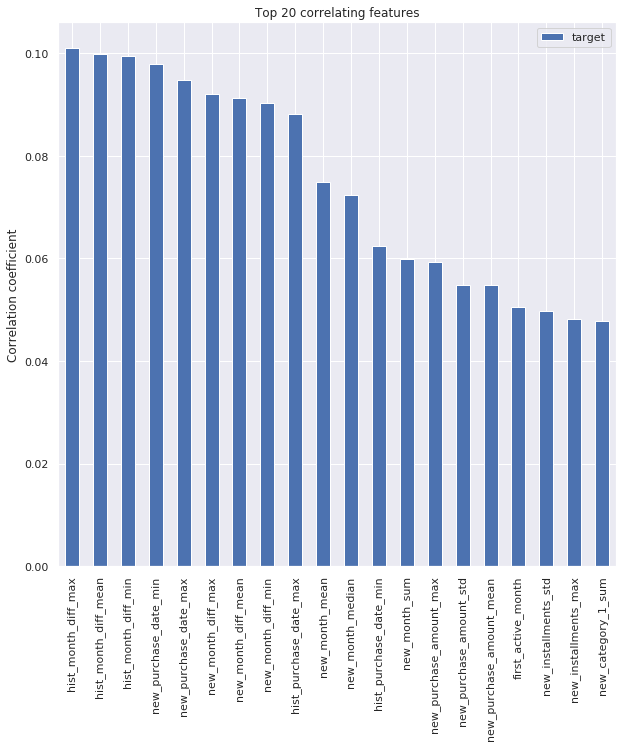

In [149]:
# Plot the correlation coefficients from high to low
corr_y[1:21].plot(kind='bar', figsize=(10, 10))
plt.title('Top 20 correlating features')
plt.ylabel('Correlation coefficient')

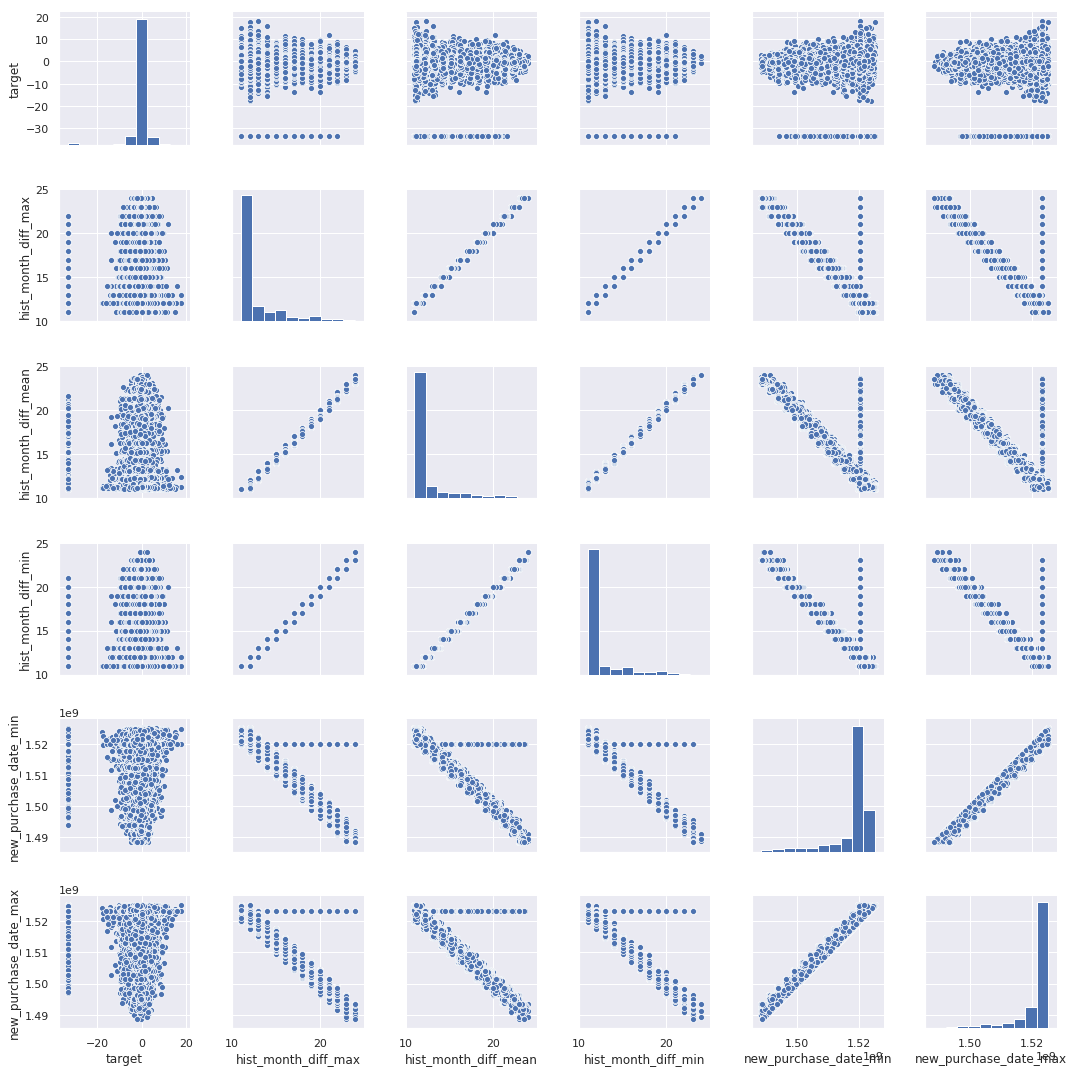

In [150]:
#Select the top 6 variables including the target variable
corr_y_col = corr_y[0:6].index
# Show a pairplot of the correlation between target variables and among coeeficients
sns.pairplot(X_y.loc[:, corr_y_col])

The graphs show clearly the outliers indentified in the exploration of the trainset. Against all predictors they are strong outliers. 
We thus decided to drop the outliers from now on. But do further investigation.
As for trees we do not need to delete outliers, we will copy the joined dataset for tree modelling and continue preprocessing for regression.

In [151]:
#Create a copy for tree model building: joined_tree_df
joined_tree_df =  joined_df.copy()

### 8.1 Further preparation for regression models

In [152]:
# Indentiy th index of the ourtliers
drop_index = train_df[y < -30].index

In [153]:
# Drop the ourtliers from both train_df and joined_df
joined_df.drop(drop_index, axis=0, inplace=True)
train_df.drop(drop_index, axis=0, inplace=True)

In [154]:
# Check if this was successful
print(len(drop_index))
print(len(train_df))

2207
199710


In [155]:
# Define X for training by splitting joined_df on the length of the trainset
X = joined_df.iloc[0:len(train_df),:]

# Extract Y for training  from the train dataset 
y = train_df.loc[:,'target']

# Concatenate X and Y for correlation calculation
X_y = pd.concat([X,y], axis=1)

In [156]:
#Compute correlation matrix
corr = X_y.corr()

# Slice on the target variable, take the absolute value and  sort the values
corr_y = np.abs(corr[['target']])
corr_y = pd.DataFrame(corr_y.sort_values('target', ascending=False))

In [157]:
# print the top 50 correlations
print(corr_y[:50])


                                         target
target                                 1.000000
new_merchant_category_id_nunique       0.176388
new_subsector_id_nunique               0.172358
new_hour_sum                           0.154825
new_avg_sales_lag3_sum                 0.154422
new_merchant_id_nunique                0.153865
new_active_months_lag6_sum             0.153781
new_active_months_lag3_sum             0.153705
new_month_sum                          0.153648
new_avg_sales_lag6_sum                 0.153263
new_active_months_lag12_sum            0.152929
new_avg_sales_lag12_sum                0.152783
new_purchase_amount_max                0.152202
new_avg_purchases_lag3_sum             0.151880
new_avg_purchases_lag12_sum            0.149139
new_avg_purchases_lag6_sum             0.149092
new_dayofweek_sum                      0.147251
new_merchant_group_id_nunique          0.145850
new_category_3_A_sum                   0.144869
new_purchase_amount_std                0

Text(0,0.5,'Correlation coefficient')

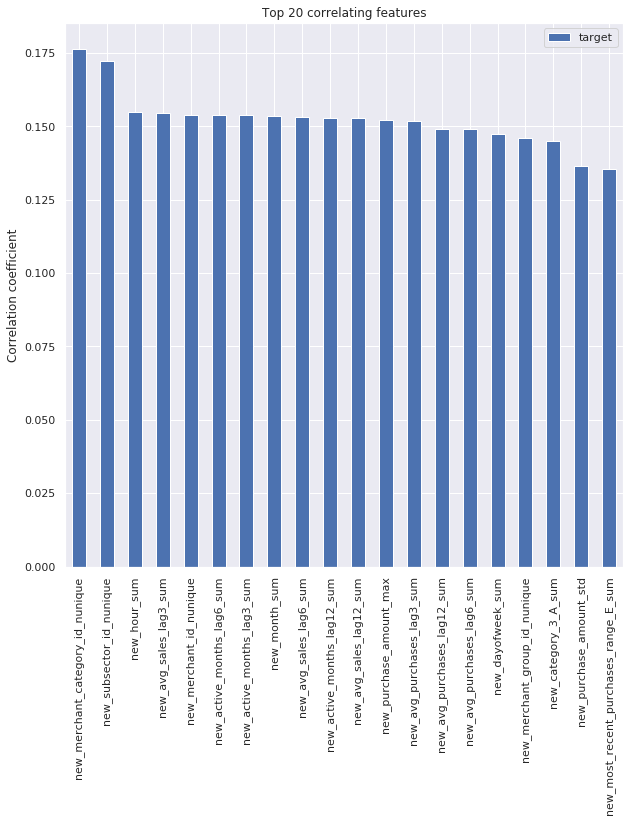

In [158]:
# plot the top correlations
corr_y[1:21].plot(kind='bar', figsize=(10, 10))
plt.title('Top 20 correlating features')
plt.ylabel('Correlation coefficient')

Clearly, the correlation between the variables increased strongly. Surprisingly almost all new transaction variables start correlating better.

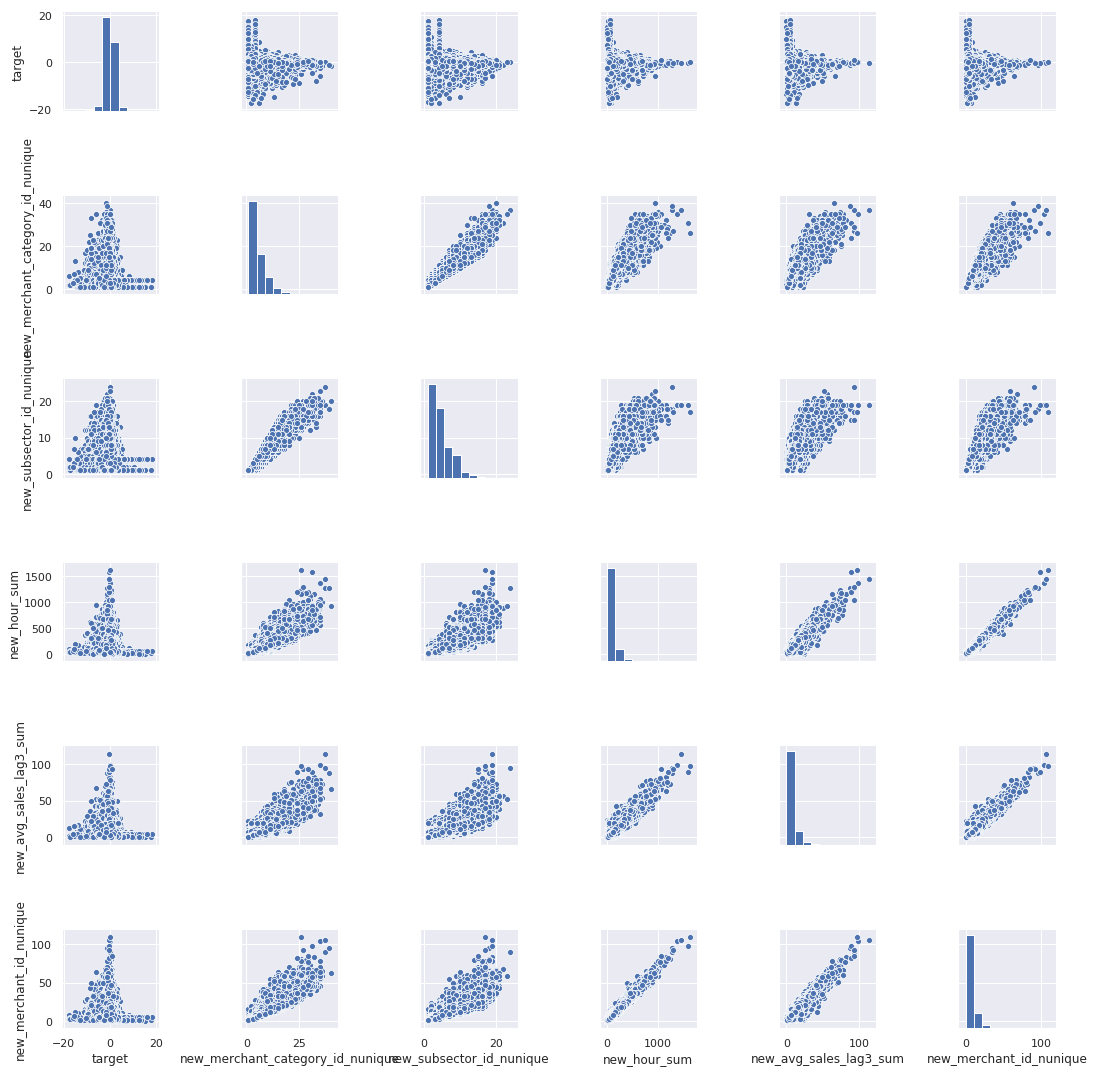

In [159]:
# Look again at the top 6 predictors
corr_y_col = corr_y[0:6].index
# Create a pariplot including target variables
sns.pairplot(X_y.loc[:, corr_y_col])

Looking at the top predictor's correlation with the target variable we see that the distributions look almost identical among each other. 

Both the purchase lag and the sales lag seem be strongly correlated. Here we need to deep dive into a correlation matrix for checking on collinearities.

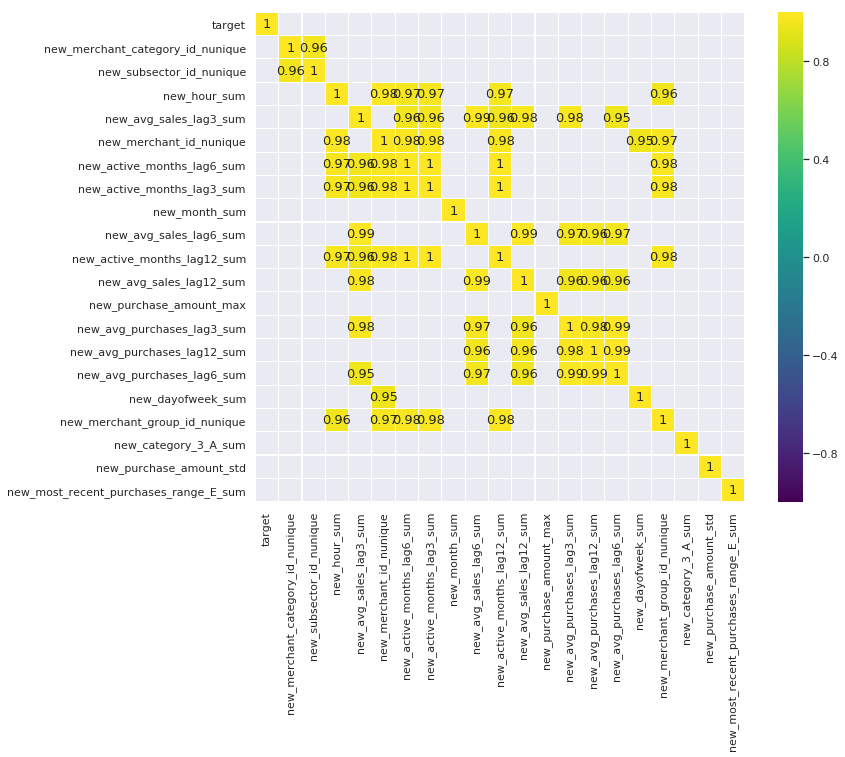

In [160]:
# select the top 20 predctors (also tried with 50 but does not show more collineritiers)
corr_y_col = corr_y[0:21].index
#correlation matrix
corrmat = corr.loc[corr_y_col,corr_y_col]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[(corrmat>0.95)|(corrmat<-0.98)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 13}, square=True);

The correlation matrix of the top 20 predictors show very strong correlation. We will thus drop some columns with a correlation coefficient higher or equal to 0.98.

In [161]:
# drop columns showing collinearities
joined_df.drop(joined_df.filter(like='avg_purchases_lag', axis=1).columns, axis=1, inplace=True)
joined_df.drop(joined_df.filter(like='active_months_lag', axis=1).columns, axis=1, inplace=True)
joined_df.drop(joined_df.filter(like='avg_sales_lag6', axis=1).columns, axis=1, inplace=True)
joined_df.drop(joined_df.filter(like='avg_sales_lag12', axis=1).columns, axis=1, inplace=True)

In [162]:
# Define X for training by splitting joined_df on the length of the trainset
X = joined_df.iloc[0:len(train_df),:]

# Extract Y for training  from the train dataset 
y = train_df.loc[:,'target']

# Concatenate X and Y for correlation calculation
X_y = pd.concat([X,y], axis=1)

In [163]:
#Compute correlation matrix
corr = X_y.corr()

# Slice on the target variable, take the absolute value and  sort the values
corr_y = np.abs(corr[['target']])
corr_y = pd.DataFrame(corr_y.sort_values('target', ascending=False))

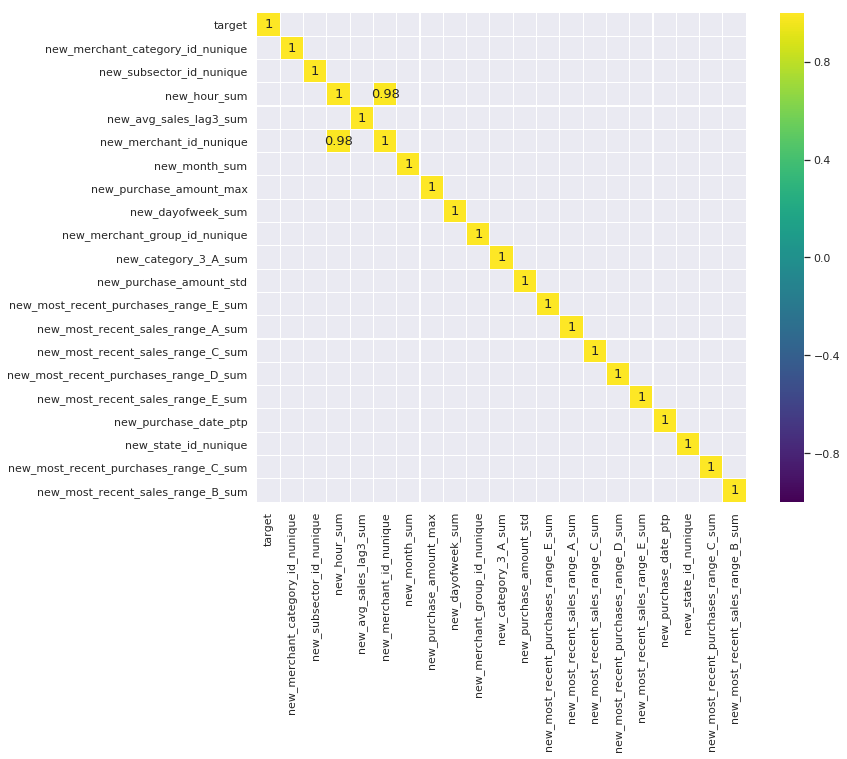

In [164]:
# select the top 20 predctors (also tried with 50 but does not show more collineritiers)
corr_y_col = corr_y[0:21].index
#correlation matrix
corrmat = corr.loc[corr_y_col,corr_y_col]
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[(corrmat>0.98)|(corrmat<-0.98)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 13}, square=True);

##### Extract for building regression models - now integrated

### Save the file

joined_df_save.loc[:, 'first_active_month'] = pd.DatetimeIndex(joined_df_save['first_active_month']).\
                                      astype(np.int64) * 1e-9

joined_df_save = joined_df.set_index('card_id')

joined_df_save.info()

- 
#planned error, please adapt the explanation and check that all datatypes are numeric

from datetime import datetime
date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
explanation = ''

filename = '../s_lohmann18/joined_train_dataset' + date + explanation +'.csv'

joined_df_save.to_csv(filename)

In [165]:
#release momory
del corr_y
gc.collect()

10353


# 9 Modelling

In [166]:
#import relevant libraries
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
#import graphviz

# fit the style of graphs
%matplotlib inline
plt.style.use('seaborn-white')
sns.set()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [167]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [168]:
def submit_prediction(y_pred, X_test, explanation="no expl"):
    #y_pred: is the data comig from the final modeling of the test set for submission
    #explanation: brief explanation of the ypred model and specifities - goes into the file name
    #X_test: place the x_test for prediction/submissing to make sure the index matches
    
    # trandform predictions into DataFrame
    y_pred = pd.DataFrame(y_pred)
    #retrieve the index from the testset
    y_pred.index = X_test.index
    #rename the column to requirement
    y_pred.columns = ['target']
    #retrieve the timestamp for storing to avoid overwrite
    date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    filepath = '../s_lohmann18/y_pred_'+ date + explanation + '.csv'
    y_pred.to_csv(filepath)

# 9.1 Build regression models

First we would like to work with regression models to fit designed predictors X towards Y. We start with a simple OLS to look at the p-values of the top predictors. This may help also particularly when looking to collinearities.

Afterwards we are including regularization to avoid overfitting our dataset considering the long list of predictors developed in the pre-processing. 
Firstly, we are choosing Lasso, as the penalty term penalizes the long list of predictors generated in the pre-processing. It is a good choice for feature selection. The key difference between these techniques is that Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features. Lambda at 0 is same as a simple linear regression. The higher lambda the higher the penalization and the stronger the feature selection. A high Lambda may thus lead to underfitting, and thus increased bias.



# 9.1.1 Prepare for model building

In preparation for the modelling we set up the needed variables. We would like to have a harmonized naming, so that we decided to name the predictors of the training set as X and corresponding to that y. And if we want to work with a train test split the variables are called: X_train, X_test, y_train, y_test.
As soon as we want to do a real prediction we use X_test_pred to predict y_pred. This can then be submitted.

In [169]:
# Set the card ID as Index
joined_df = joined_df.set_index('card_id')

When building regression models with penalty terms, we need to scale the data upfront to penalize every coefficient fairly. Here we use the StanadardScaler. We decided against doing it in a pipeline as we want to scale the test data together with the train data to make sure the standard score of a sample x is calculated on the total data and that the features after scaling each feature really mean the same:

    z = (x - u) / s

Each feature is independently computed. We will use the scaled dataset for L1 and L2 regression. It would have to be done for KNN, too.

In [170]:
#normalise the joined dataset using StandardScaler
norm_array = joined_df.values
scaler = StandardScaler()
scales_array = scaler.fit_transform(norm_array)

#transform the scaled array back into a dataframe with correct indexes
df_scaled = pd.DataFrame(scales_array, columns=joined_df.columns, index=joined_df.index) 
df_scaled.head()

,first_active_month,feature_1,feature_2,feature_3,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_authorized_flag_max,hist_city_id_nunique,hist_category_1_sum,hist_category_1_mean,...,new_numerical_1_median,new_numerical_1_max,new_numerical_1_min,new_numerical_1_std,new_numerical_2_sum,new_numerical_2_mean,new_numerical_2_median,new_numerical_2_max,new_numerical_2_min,new_numerical_2_std
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,0.372600,1.595479,0.341583,0.877557,1.653211,0.496098,0.0,0.598567,-0.288972,-0.484101,...,-0.125356,0.122719,-0.172228,-0.252736,-0.103275,-0.159414,-0.173687,0.291992,-0.131960,-0.021180
C_ID_3d0044924f,-0.041071,0.753089,-0.991553,-1.139527,2.573797,0.658823,0.0,1.170572,1.123949,-0.057095,...,-0.229560,-0.659877,-0.172228,-0.761326,-0.483024,-0.367777,-0.115764,-0.543424,-0.131960,-0.576964
C_ID_d639edf6cd,-0.460222,-0.931690,0.341583,-1.139527,-0.408100,0.526074,0.0,0.026562,-0.288972,-0.484101,...,-0.177498,-0.795963,0.022626,-0.313309,-0.352107,-0.409131,-0.115764,-0.645674,0.013019,-0.429953
C_ID_186d6a6901,0.624638,0.753089,1.674718,-1.139527,-0.047871,0.932886,0.0,0.598567,0.257965,0.267500,...,-0.229560,0.683922,-0.172228,0.543436,0.809075,0.493004,-0.115764,0.786401,-0.131960,0.696442
C_ID_cdbd2c0db2,0.791750,-1.774079,1.674718,-1.139527,0.462454,0.603154,0.0,0.312565,0.394700,0.059735,...,-0.281702,2.538405,-0.172228,0.899231,1.884359,0.100183,-0.231611,2.677576,-0.131960,0.989262


In [171]:
#Define X and y from the scaled df
X = df_scaled.iloc[0:len(train_df),:]
y = train_df.loc[:,'target']
y.index = X.index
print(X.shape, y.shape)

(199710, 251) (199710,)


In [172]:
#Define the test set finally used for prediction
X_test_pred = df_scaled.iloc[len(train_df):, :]
X_test_pred.head()

,first_active_month,feature_1,feature_2,feature_3,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_authorized_flag_max,hist_city_id_nunique,hist_category_1_sum,hist_category_1_mean,...,new_numerical_1_median,new_numerical_1_max,new_numerical_1_min,new_numerical_1_std,new_numerical_2_sum,new_numerical_2_mean,new_numerical_2_median,new_numerical_2_max,new_numerical_2_min,new_numerical_2_std
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_0ab67a22ab,0.205488,-0.089300,1.674718,0.877557,-0.378081,-2.163165,0.0,0.598567,0.759324,1.146231,...,-0.281702,-0.795963,-0.107244,-0.904981,-0.452627,-0.426501,-0.173687,-0.628650,-0.059471,-0.661991
C_ID_130fd0cbdd,-0.041071,-0.931690,1.674718,-1.139527,-0.047871,0.821548,0.0,-0.259441,-0.197815,-0.360502,...,-0.333845,-0.778949,-0.172228,-0.897034,-0.906424,-0.506978,-0.231611,-0.662724,-0.131960,-0.697625
C_ID_b709037bc5,0.539712,1.595479,-0.991553,0.877557,-0.728303,-1.764918,0.0,-0.259441,-0.243394,-0.113303,...,0.526259,-0.285619,-0.172228,0.077957,-0.443335,-0.512715,-0.231611,-0.679775,-0.131960,-0.712086
C_ID_d27d835a9f,0.873936,-0.931690,-0.991553,-1.139527,-0.558195,0.932886,0.0,-1.117448,-0.288972,-0.484101,...,0.500269,0.837206,-0.172228,0.603463,-0.239594,-0.179155,-0.231611,-0.015230,-0.131960,-0.116293
C_ID_2b5e3df5c2,-1.128670,1.595479,-0.991553,0.877557,0.052193,-0.899908,0.0,0.026562,-0.288972,-0.484101,...,-0.333845,0.411697,-0.172228,0.506329,0.230807,0.263845,-0.231611,0.581586,-0.131960,0.719953


Set up a train-test split for first estimation of the quality of prediction without using the long calculation time of cross-validation. We chose a test_size of 0.3 to train with 70% of the data. We add a random state to avoid an impact of any order.

In [173]:
# Do a train testsplit to do a first estimation on the quality of the prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 9.1.2 Multiple linear regression

First we model a simple linear regression using stats models, which offers a very nice tables showing the p-value of relevant columns. We will check which columns are considered to be statistically significant for the prediction of the loyalty score.

### 9.1.2.1 Simple model without regularization using train-test split

In [174]:
# fir the train set
regr_ols = sm.OLS( y_train, X_train).fit()

# print the summary of the model 
regr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     84.62
Date:                Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:07:59   Log-Likelihood:            -2.6432e+05
No. Observations:              139797   AIC:                         5.291e+05
Df Residuals:                  139550   BIC:                         5.316e+05
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
first_active_month                            0.0103      0.008      1.289      0.197      -0.005       0.026
feature_1                                     0.0047      0.006      0.812      0.417      -0.007       0.016
feature_2                                    -0.0132      0.005     -2.868      0.004      -0.022      -0.004
feature_3                                    -0.0213      0.006     -3.526      0.000      -0.033      -0.009
hist_authorized_flag_sum                      0.1125      0.066      1.715      0.086      -0.016       0.241
hist_authorized_flag_mean                     0.0305      0.006      4.954      0.000       0.018       0.043
hist_authorized_flag_max                     -0.0002   3.74e-05     -6.375      0.000      -0.000      -0.000
hist_city_id_nunique                          0.0412      0.010      4.104      0.000       0.022       0.061
hist_category_1_sum                           0.0204      0.014      1.494      0.135      -0.006       0.047
hist_category_1_mean                         -0.0492      0.019     -2.580      0.010      -0.087      -0.012
hist_category_1_median                        0.0165      0.011      1.477      0.140      -0.005       0.038
hist_installments_sum                        -0.0845      0.037     -2.306      0.021      -0.156      -0.013
hist_installments_median                     -0.0019      0.011     -0.177      0.859      -0.023       0.019
hist_installments_max                         0.0330      0.013      2.500      0.012       0.007       0.059
hist_installments_min                        -0.0202      0.007     -2.917      0.004      -0.034      -0.007
hist_installments_std                         0.0244      0.015      1.666      0.096      -0.004       0.053
hist_merchant_category_id_nunique             0.0802      0.021      3.753      0.000       0.038       0.122
hist_merchant_id_nunique                     -0.0976      0.042     -2.338      0.019      -0.179      -0.016
hist_month_lag_min                            0.0578      0.061      0.954      0.340      -0.061       0.177
hist_month_lag_max                            0.0577      0.014      4.269      0.000       0.031       0.084
hist_purchase_amount_sum                      0.2743      0.573      0.479      0.632      -0.848       1.397
hist_purchase_amount_mean                     0.4420      0.572      0.773      0.440      -0.679       1.563
hist_purchase_amount_median                   0.0544      0.007      7.514      0.000       0.040       0.069
hist_purchase_amount_max                     -0.2742      0.593     -0.463      0.644      -1.436       0.887
hist_purchase_amount_min                     -0.0147      0.004     -3.650      0.000      -0.023      -0.007
his

Text(0.5,1,'Top 30 predictors from simple linear regression')

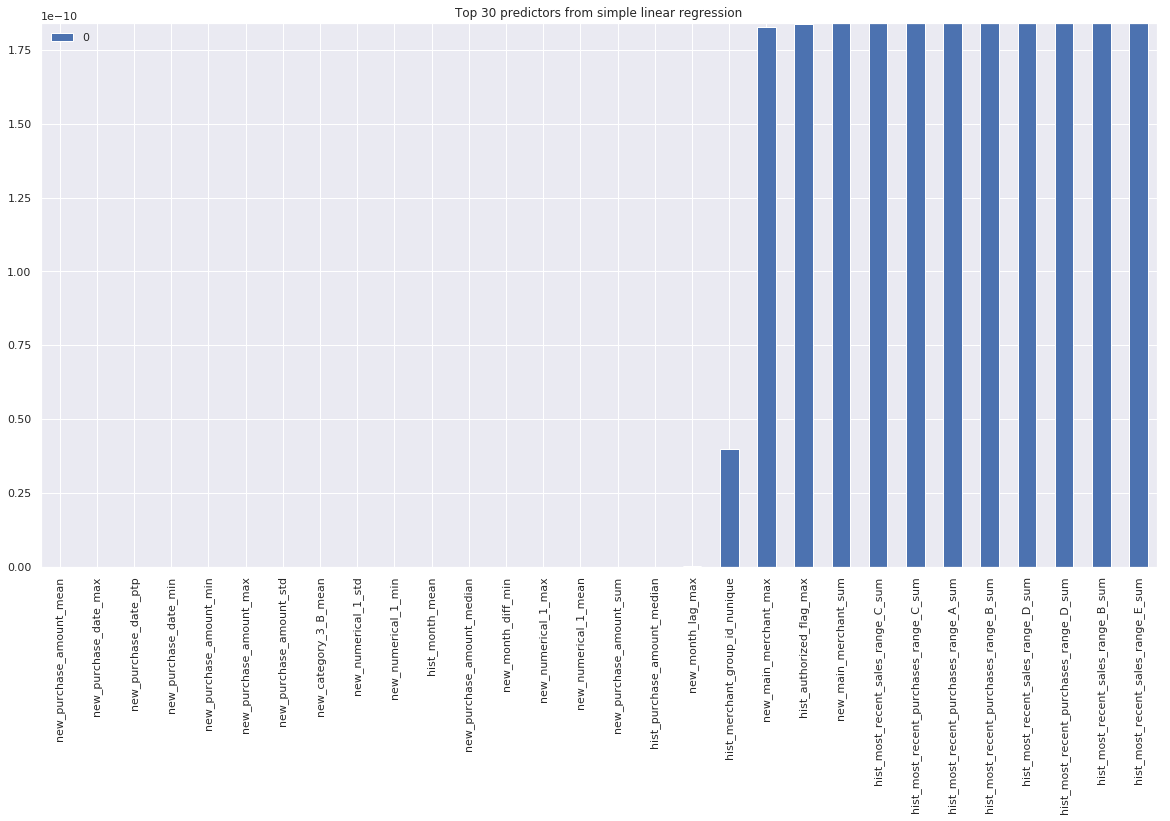

In [175]:
# extract predictors with a p-value smaller than 0.025 (assuming a two-tailed text with a critical alpha=5%)
predictors = regr_ols.pvalues[regr_ols.pvalues < 0.025] 

# Store info in Dataframe and sort
predictors = pd.DataFrame(predictors.sort_values(ascending=True))

#plot top 30 predictors
predictors[:30].plot(kind='bar',figsize=(20,10))
plt.title('Top 30 predictors from simple linear regression')

In [176]:
# sum up the number of predictors
print(len(predictors))

83


In [177]:
# predict on X_test
y_pred = regr_ols.predict(X_test)

In [178]:
# Compute and print RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1.6664351425106916


We will see that compared to the following results the RMSE and the r2 seem to be quite good, however multiple linear regression tend to overfit the data. We will thus look now more into lasso and ridge regression as they usually do much better on predictions of test data.
Next to that we did not use cross validation but only a simple split.

Our kaggle score confirms the assumption ending up at 3.900 as rmse.

### 9.1.2.2 Predict X_test_pred for submission

In [179]:
#predict lasso on X_test_pred: y_pred
y_pred = regr_ols.predict(X_test_pred)

In [180]:
# make a submission
submit_prediction(y_pred,X_test_pred, explanation="ols")

## 9.1.3 Lasso

After having fitted a simple multiple regression model, we want to regularize the model to avoid overfitting and thus high variance. As we have a long list of features we considered lasso regression as our first choice as it has a built in feature selection by shrinking the coefficients closer to 0.

### 9.1.3.1 Simple model with LASSO (L1) Regularization using train-test split
The fastest and simplest way of fitting a lasso regression is by preestimating few parameters. It may help for a first guess, however to receive a good prediction and to avoid over or underfitting/ -penalizing Gridsearch togeter with Cross validation will be used afterwards.

Lasso Stanadrd paramaters:
Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)[source]¶

In [181]:
# Initiate Lasso regression
lasso = Lasso(alpha=0.8, normalize=True)
# Fit X_train and Y_train
lasso.fit(X_train, y_train)
# Predict X_test: lasso_pred
lasso_pred = lasso.predict(X_test)


For regessions we will mainly use the r^2 as score function, which ranges between 0 and 1. 1 is a very high score, while 0 or close to 0 is very weak.

In [182]:
#  Compute the R^2 for the test set
r2 = lasso.score(X_test, y_test)
print("R^2: {}".format(r2))

R^2: -1.4098451357247299e-05


Our first prediction is rather weak. Let's compute the mean quared error as well. A loss function which can be used for almost all model types, testing how far the predictions are from the true value.

In [183]:
# Calcualte the mean squarred error
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1.7166336592563558


The result is again relatively weak. R^2 is even negative for our X_test and y test check. Comparing the results of the RMSE of the test set of the multiple linear model (1.66) towards the first result from the lasso regression (RMSE:1.71), the estimation is worse, still however not too far. 

Lambda should thus not be randomly chosen but optimized. :)

### 9.1.3.2  LASSO model using cross validation with best parameter

As the first estimation can only give a first quick prediction, we now want to optimize the parameter alpha. Next to that we will use cross validation, cv=5, to do 5 train test splits to fit and predict. During optimization R^2 is calculated as score of each alpha and testsplit combination. Out of the 5 scores we can calculate the standard deviation among for each alpha to one the one hand see how stable the predictions (how high the variance in r^2) are and on the other hand which alpha gets the highest R^2.

In [184]:
n_folds=3 #[(slice(None), slice(None))]
# Setup the hyperparameter grid
alpha_space = np.logspace(-3.5, -2, 5) #np.logspace(2, 4, 5)
param_grid = {'alpha': alpha_space}

# Instantiate a Ridge regression object: ridge
lasso = Lasso(normalize=False)

# Instantiate the GridSearchCV object: logreg_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=n_folds)

# Fit it to the data
lasso_cv.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.00032, 0.00075, 0.00178, 0.00422, 0.01   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [185]:
# Print the tuned parameters and score
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_)) 
print("Best score is {}".format(lasso_cv.best_score_))

Tuned Lasso Regression Parameters: {'alpha': 0.00031622776601683794}
Best score is 0.12585562944379494


(0.00031622776601683794, 0.01)

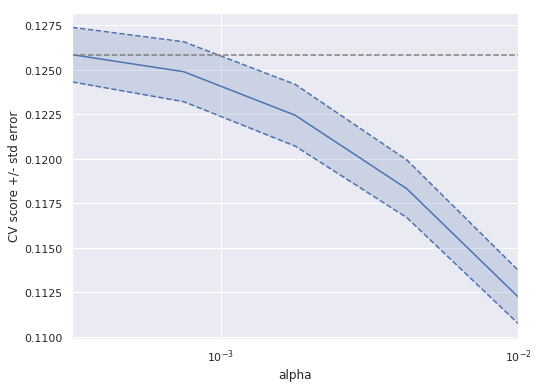

In [186]:
#plot:
scores = lasso_cv.cv_results_['mean_test_score']
scores_std = lasso_cv.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alpha_space, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alpha_space, scores + std_error, 'b--')
plt.semilogx(alpha_space, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alpha_space, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alpha_space[0], alpha_space[-1]])

#this is R^2 , thus the higher the better

In [187]:
# predict on our testset used from train test split
lasso_pred = lasso_cv.predict(X_test)

In [188]:
# Calcualte the mean squarred error - even if it cannot be interpreted as independent testset
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1.6017357253512285


The graph shows that the best penalty coefficient lambda is very small and close to 0 and the peak of the graph is not even reached. There is thus almost no penalization and thus feature selection. This may be related to quite some remaining collinearity. The r^2 improved but is still very weak with 12%.

The RMSE for checking again on the test set is creased towards 1.6. It is however not really comparable anymore, as the data was somehow already used for the fitting.

#Compute the regularization path using LassoCV
alpha_space = np.logspace(-4, 3, 5)
n_folds = 5

#Initate LassoCV regreaasion object: ridge_cv
lasso_cv = LassoCV(alphas=alpha_space, cv = n_folds, fit_intercept=False)
lasso_cv.fit(X, y)

# 
lasso_cv.alpha_

lasso_cv.score(X, y)

### 9.1.3.3 Predict X_test_pred for submission

In [189]:
#predict lasso on X_test_pred: y_pred
y_pred_lasso = lasso_cv.predict(X_test_pred)

In [190]:
# make a submission
submit_prediction(y_pred_lasso,X_test_pred, explanation="lassoCV5,logspace(-3.5, -2, 5) ")

## 9.1.4 Ridge

While lasso regularization can shrink coefficients to zero, ridge regression shirnks the coefficients closer to 0 but never completely to 0. The higher lambda, here alpha, the more the coefficients are penalized.
While Lasso has the advantage of feature selection, ridge can handle multicolinearities better , thus shrink data in groups. As we developmed featured by using min, max, sum and mean, our features my even after removing the strongest colinearities still have strongly correlated features. We will thus fit also a ridge regression using Cross validation and paramater search. Here however with the build in function, which seems to be a little bit quicker.


Stanadrd params of Ridge:
Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)[source]¶

### 9.1.4.1 Ridge model using cross validation with best parameter

In [191]:
#Compute the regularization path using RidgeCV
alpha_space = np.logspace(1,3.5, 10)
n_folds = None

#Initate RidgeCV regreaasion object: ridge_cv
ridge_cv = RidgeCV(alphas=alpha_space, fit_intercept= False, cv = n_folds, 
                  scoring='neg_mean_squared_error', store_cv_values=True)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([  10.     ,   18.95736,   35.93814,   68.12921,  129.15497,
        244.84367,  464.15888,  879.92254, 1668.10054, 3162.27766]),
    cv=None, fit_intercept=False, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=True)

In [192]:
# Print R^2 for X and y 
r2 = ridge_cv.score(X, y)
print("R^2: {}".format(r2))

R^2: 0.12654882027896663


In [193]:
#best alpha
ridge_cv.alpha_

879.9225435691075

In [194]:
# predict on our testset used from train test split
ridge_pred = ridge_cv.predict(X_test)

In [195]:
# Calcualte the mean squarred error - even if it cannot be interpreted as independent testset
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 1.6032260273757635


The result for the ridge regression is close towards the results from lasso regression. However still slightly better. 

### 9.1.4.2 Predict X_test_pred for submission

In [196]:
#make a prediction with ridge_cv
y_pred_ridge = ridge_cv.predict(X_test_pred)

In [197]:
#Makre a submission
submit_prediction(y_pred_ridge,X_test_pred, explanation="ridge_cv_lg:-4, 3, 5_alpha:1000")

## 9.1.5 Elastic Net
The elastic net is the combination of the lasso regression and ridge regression by penalizing with both the L1 and the L2 term. It can thus take the advantage of both lasso and ridge regression. 
The advantage comes however also along with a second paramater next to lambda which is alpha. Unfortunately it is the other way around in SK learn, thus the l1-ratio is the alpha being between 0 and 1 - 1 beeing lasso, 0 being ridge. Next to that lambda has to be chosen. 
Even though better results are expected it comes along with very long calcualtion time to optimize the two paramaters using gridsearch and cross validation. We thus marked down the code.

Default Parameter:
sklearn.linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)

### 9.1.5.1 Cross validation and parameter search on the elastic net

In [198]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

n_folds=3
### Setup the hyperparameter grid
alpha_space = np.logspace(-0.7, 0.2, 10)
l1_ratio = [0.3, 0.5, 0.8]
param_grid = {'alpha': alpha_space, 'l1_ratio': l1_ratio}

### Instantiate a Elastic net regression object: ridge
enet = ElasticNet()

### Instantiate the GridSearchCV object: logreg_cv
enet_cv = GridSearchCV(enet, param_grid, cv=n_folds)

### Fit it to the data
enet_cv.fit(X,y)

enet_cv.best_params_

enet_cv.best_score_

#### predict on our testset used from train test split
enet_pred = enet_cv.predict(X_test)

#### Calcualte the mean squarred error
mse = mean_squared_error(y_test, enet_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

### 9.1.5.2 Predict X_test_pred for submission

y_pred = enet_cv.predict(X_test_pred)

Elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. Regularization is adding a penalty term to the objective function and control the model complexity using that penalty term. Regularization is basically a technique to cope with over-fitting which comes up in training a model on sample data.

In [199]:
#reduce memory
del joined_df
del train_df
gc.collect()

10398

# 9.2 Build a model with decision trees

# 9.2.1 Prepare for model building

For building trees we do not need a scaled dataset, so we will reinitiate the variables based on the train_df and the joined_df. For sure normally we should keep all outliers, and for some treee based algorythms missing values can be kept, too. However to avoid making the kernal more complex we stay with the cleaned data in the predictors. Still all data including the outliers from the target variable are in. Also colinearities are kept. The algorythm will choose the best predictor out of them.

In [205]:
#reload train_df including all outliers 
train_df =  pd.read_csv("../loecher/public/train.csv.gz", parse_dates=['first_active_month'])
# Set the index for the joinedtree_df
joined_tree_df.set_index('card_id', inplace=True)

In [206]:
#Define X and y from the joined_tree_df and train_df
X = joined_tree_df.iloc[0:len(train_df),:]
y = train_df.loc[:,'target']
y.index = X.index
print(X.shape, y.shape)

(201917, 347) (201917,)


In [207]:
#Define the test set finally used for prediction
X_test_pred = joined_tree_df.iloc[len(train_df):, :]
X_test_pred.head()

,first_active_month,feature_1,feature_2,feature_3,hist_authorized_flag_sum,hist_authorized_flag_mean,hist_authorized_flag_max,hist_city_id_nunique,hist_category_1_sum,hist_category_1_mean,...,new_numerical_1_median,new_numerical_1_max,new_numerical_1_min,new_numerical_1_std,new_numerical_2_sum,new_numerical_2_mean,new_numerical_2_median,new_numerical_2_max,new_numerical_2_min,new_numerical_2_std
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_0ab67a22ab,1.491005e+09,3,3,1,44,0.646973,1,7,23,0.338135,...,-0.047546,-0.027725,-0.047546,0.011444,-0.122803,-0.040955,-0.047546,-0.027725,-0.047546,0.011444
C_ID_130fd0cbdd,1.483229e+09,2,3,0,77,0.987305,1,4,2,0.025635,...,-0.057465,-0.017807,-0.057465,0.013222,-0.507324,-0.056366,-0.057465,-0.047546,-0.057465,0.003304
C_ID_b709037bc5,1.501546e+09,5,1,1,9,0.692383,1,4,1,0.076904,...,0.106140,0.269775,-0.057465,0.231323,-0.114929,-0.057465,-0.057465,-0.057465,-0.057465,0.000000
C_ID_d27d835a9f,1.512086e+09,2,1,0,26,1.000000,1,1,0,0.000000,...,0.101196,0.924316,-0.057465,0.348877,0.057709,0.006413,-0.057465,0.329102,-0.057465,0.136108
C_ID_2b5e3df5c2,1.448928e+09,5,1,1,87,0.791016,1,5,0,0.000000,...,-0.057465,0.676270,-0.057465,0.327148,0.456299,0.091248,-0.057465,0.676270,-0.057465,0.327148


Set up a train-test split for first estimation of the quality of prediction without using the long calculatation time of cross-validation

In [208]:
# Do a train testsplit to do a first estimation on the quality of the prediction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 9.2.2 DecisionTreeRegresssor
### 9.2.2.1 Simple decision tree regressor with train-test split

We started with a simple decision tree using the Decision Tree Regressor. Here we tried out different depths of the tree. Finally 4 seemed to be the best fitting depth for the train-test split.

sklearn.tree.DecisionTreeRegressor(criterion=’mse’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)

The default criterion for the split is to minimize is the mse, so it will chose the feature minimizing the mse most.  This fits very well for the competition. 

--> from SKlearn: Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node, “friedman_mse”, which uses mean squared error with Friedman’s improvement score for potential splits, and “mae” for the mean absolute error, which minimizes the L1 loss using the median of each terminal node.


In [209]:
# Build a decision tree, try out different depths and control quality with the test set
# Fit the decision tree try different maximum depth by keeping other parameters default
dtr = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)

In [210]:
#calculate the R^2 for the test set
r2 = dtr.score(X_test, y_test)
print("R^2: {}".format(r2))

R^2: 0.05386646110418236


In [211]:
# calculat the mean squared error of the tree
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.738566731604811


### 9.2.2.2 Repeat the tree modeling using bagging

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting [1]. If samples are drawn with replacement, then the method is known as Bagging [2]. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces [3]. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches [4].

sklearn.ensemble.BaggingRegressor(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)[source]¶

In [212]:
# set up Bagging regressor to build multiple regressions
bagged = BaggingRegressor(base_estimator=dtr,n_estimators=20)
bagged.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [213]:
# calcualte r^2 on testset
r2 = bagged.score(X_test, y_test)
print("R^2: {}".format(r2))

R^2: 0.06432653596951976


In [214]:
# predict baggedpreds based on X_test: baggedPreds
baggedPreds = bagged.predict(X_test)
#Compute the mean squared error of true y_test against prediction
mse = mean_squared_error(y_test, baggedPreds)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.7178432437786584


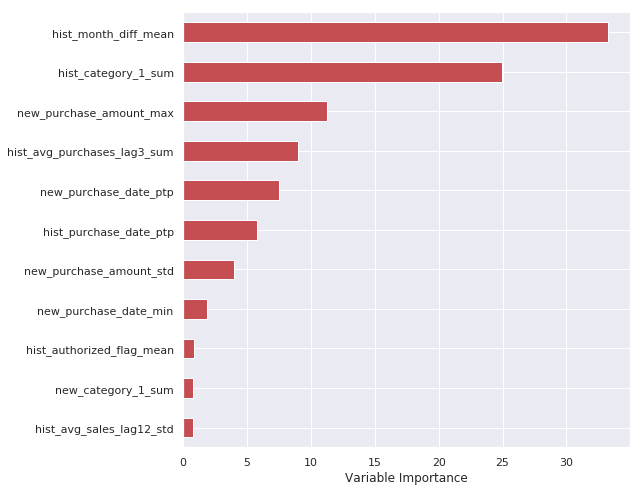

In [215]:
# Retrieve the feature importance from the tree
feature_importance = dtr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending=True, inplace=False)
# select only features  importance higher than 0
rel_imp = rel_imp[rel_imp>0]
#print(rel_imp)
# plot the most important features
rel_imp.T.plot(kind='barh', color='r',figsize=(8,8) )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

In [216]:
### 9.2.2.3 Predict X_test_pred for submission

In [217]:
# train the Bagging regressor on the complete dataset for final predidction. Use optimized parameters from above
bagged = BaggingRegressor(base_estimator=dtr,n_estimators=20)
bagged.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [218]:
# Predict X_test_pred to y_pred
y_pred_dtr_bag = bagged.predict(X_test_pred)

In [219]:
# make a submission
submit_prediction(y_pred_dtr_bag,X_test_pred, explanation="bagged, DTR, depth=4, n_est=20")

## 9.2.3 GradientBoostingRegressor

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

loss : {‘ls’, ‘lad’, ‘huber’, ‘quantile’}, optional (default=’ls’)

loss function to be optimized. ‘ls’ refers to least squares regression. ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order information of the input variables. ‘huber’ is a combination of the two. ‘quantile’ allows quantile regression (use alpha to specify the quantile).




sklearn.ensemble.GradientBoostingRegressor(loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)

### 9.2.3.1 Simple model with train-test-split

In [220]:
# set up the gradient Booting regressor
gbr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=1)
# fit the model
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [221]:
# culculate the r^2 of the test set
r2 = gbr.score(X_test, y_test)
print("R^2: {}".format(r2))

R^2: 0.074566590907317


In [222]:
# predict the testset
pred = gbr.predict(X_test)

In [223]:
# calculate the mean suarred error for prediction against truth
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.697443148590495


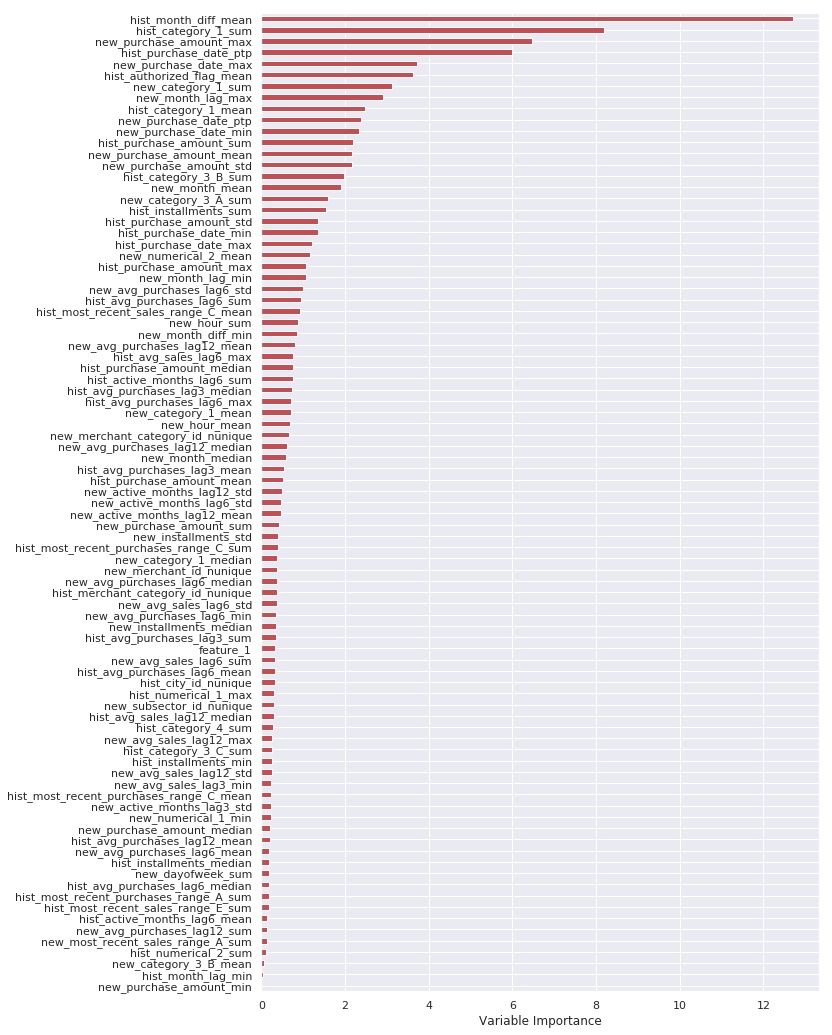

In [224]:
# Retrieve the feature importance from the tree
feature_importance = gbr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending=True, inplace=False)
# select only features  importance higher than 0
rel_imp = rel_imp[rel_imp>0]
#print(rel_imp)
# plot the most important features
rel_imp.T.plot(kind='barh', color='r', figsize=(10,18))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

### 9.2.3.2 Repeat the tree modeling using bagging

In [225]:
# set up the bagging regressor
bagged = BaggingRegressor(base_estimator=gbr,n_estimators=5)
# fit the model
bagged.fit(X_train, y_train)

BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [226]:
#calculate r^2 fro testset
r2 = bagged.score(X_test, y_test)
print("R^2: {}".format(r2))

R^2: 0.07217046271005179


In [227]:
#predict baggedPreds based on X_test
baggedPreds = bagged.predict(X_test)
# calculate the mean quared error on the bagged preds
mse = mean_squared_error( y_test, baggedPreds)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.7022267561065103


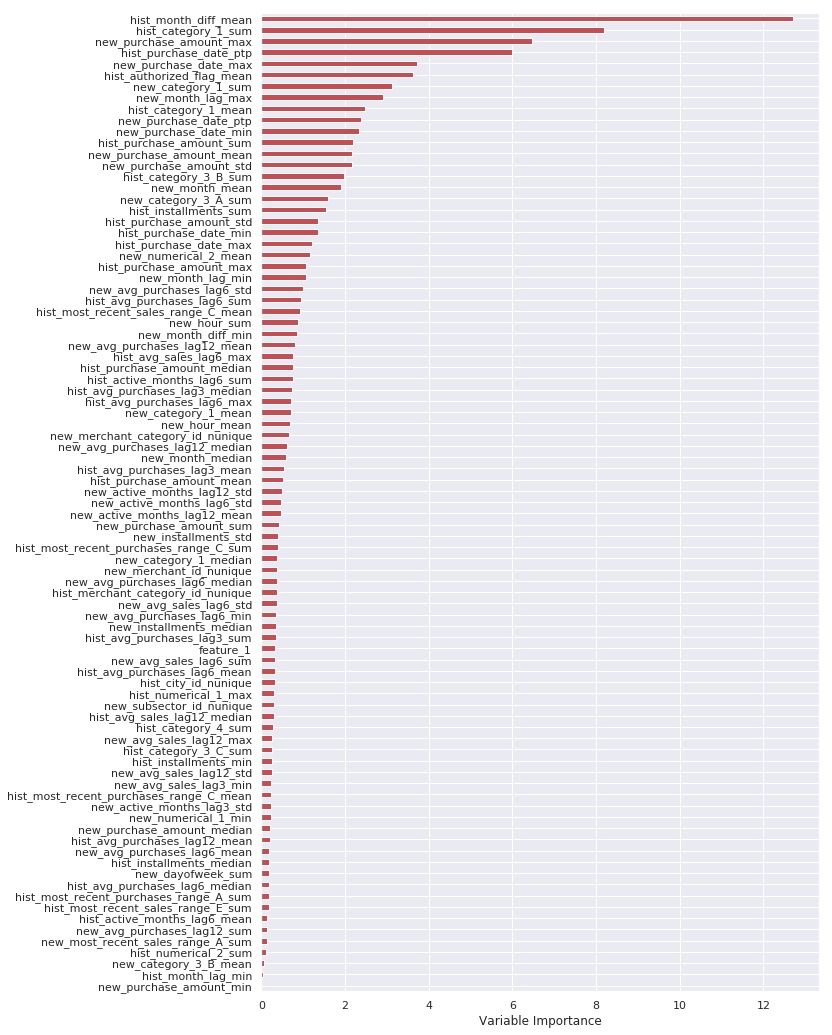

In [228]:
# Retrieve the feature importance from the tree
feature_importance = gbr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(ascending=True, inplace=False)
# select only features  importance higher than 0
rel_imp = rel_imp[rel_imp>0]
#print(rel_imp)
# plot the most important features
rel_imp.T.plot(kind='barh', color='r', figsize=(10, 18))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.show()

### 9.2.3.3 Predict X_test_pred for submission

In [229]:
#### train the bagging regressor on the defined parameter with the full dataset
bagged = BaggingRegressor(base_estimator=gbr,n_estimators=10)
bagged.fit(X, y)

BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [230]:
# predict X_test_pred
y_pred_gbr_bag = bagged.predict(X_test_pred)

In [231]:
submit_prediction(y_pred_gbr_bag,X_test_pred, explanation="bagged, GBR n_estimators=50, learning_rate=0.1, random_state=1, n_est=20")

## 9.2.4 RandomForestRegressor

Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. Random Forest has nearly the same hyperparameters as a decision tree or a bagging classifier. In Random Forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node.

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)[source]¶

In [232]:
from sklearn.ensemble import RandomForestRegressor

In [233]:
#Building RandomForestRegressor
rfr = RandomForestRegressor(max_features=6, n_estimators =10, oob_score=True,random_state=1)
#fit the model
rfr.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [234]:
# Print the out-of-bag samples R^2 score
rfr.oob_score

True

In [235]:
# predict y_pred  basesd on X_test_pred
y_pred = rfr.predict(X_test_pred)
y_pred

array([ 0.39711596, -0.57356749,  0.51544004, ...,  1.32179497,
       -7.4018222 , -0.08573665])

In [236]:
submit_prediction(y_pred,X_test_pred, explanation="RandomForest, max_featured=4, oob, n_est=10")

Leanring: 
- hard to interpret data when it is anonymized, hard to interpret true causality
- learn how to handle big data sets
- comparison of models and its various parameters
- a kernel is never done
- great first coding experience

Conclusion:
For this dataset being highly impacted by outliers, decision trees seem to be the better choice. This is not only shown by the result on kaggle but also already in the graphical analysis.
The exploratory analysis of the target variable against the best predictors showed that there are some outliers which we removed so far. However, by spending a closer look we found two other predictors showing this pattern which is the purchase date against the difference in months.
What the exploratory analysis showed is confirmed by the decision tree, which is splitting first on historical month_diff. It may thus be interesting to combine both regression models with the decision trees. Using the trees to predict first very strong splits and do then regression in each region. It is called the linear model tree. We briefly touched it in class however due to limited time we could not further investigate on that for now.


Outlook:
    try more feature engineering from the data
    fit other models from other libraries like h2O or lgb or xgboost
    try to find more about linear model trees
    